# Proyecto Individual nro 2. Data Analytics 

# Análisis Exploratorio de los datos

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import re

In [85]:
df = pd.read_csv('AccidentesAviones.csv')
df.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [86]:
df.shape

(5008, 18)

In [87]:
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

### Diccionario de los datos

- Date - Fecha del accidente<br>
- Time - Hora local, en 24 h. en el formato hh:mm<br>
- Location - Ubicación del accidente<br>
- Operator - Aerolínea u operador de la aeronave<br>
- Flight -  Número de vuelo asignado por el operador de la aeronave<br>
- Route - Ruta completa o parcial volada antes del accidente<br>
- Type - Tipo de aeronave<br>
- Registration - Matrícula OACI de la aeronave<br>
- cn/In - Número de construcción o de serie / Número de línea o de fuselaje<br>
- Total Aboard - Total de personas a bordo<br>
- Passengers Aboard - Pasajeros a bordo<br>
- Crew Aboard - Tripulación a bordo<br>
- Total Fatalities - Muertes totales<br>
- Passengers Fatalities - Muertes de pasajeros<br>
- Crew Fatalities - Muertes de la tripulación<br>
- Ground - Total de muertos en el suelo, muertos por daño colateral<br>
- Summary - Breve descripción del accidente y la causa, si se conoce<br>

In [88]:
# Cambiamos los nombres de la columna 
df = df.rename(columns={'fecha': 'date'})
df = df.rename(columns={'HORA declarada': 'time'})
df = df.rename(columns={'Ruta': 'location'})
df = df.rename(columns={'OperadOR': 'airline_operator'})
df = df.rename(columns={'OperadOR': 'operador'})
df = df.rename(columns={'ac_type': 'aircraft_type'})
df = df.rename(columns={'PASAJEROS A BORDO': 'passengers_aboard'})
df = df.rename(columns={'cantidad de fallecidos': 'total_fatalities'})



In [89]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'location', 'airline_operator',
       'flight_no', 'route', 'aircraft_type', 'registration', 'cn_ln',
       'all_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [90]:
df.isnull().sum() 

Unnamed: 0              0
date                    0
time                    0
location                0
airline_operator        0
flight_no               0
route                   0
aircraft_type           0
registration            0
cn_ln                   0
all_aboard              0
passengers_aboard       0
crew_aboard             0
total_fatalities        0
passenger_fatalities    0
crew_fatalities         0
ground                  0
summary                 0
dtype: int64

### Dropeo las columnas innecesarias

In [91]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('registration', axis=1, inplace=True)
df.drop('cn_ln', axis=1, inplace=True)
df.drop('ground', axis=1, inplace=True)
df.columns

Index(['date', 'time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'all_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passenger_fatalities', 'crew_fatalities',
       'summary'],
      dtype='object')

### Nulos

In [92]:
# Reemplazamos los '?' con 'NaN' 

df.replace('?', None, inplace=True)

## Transformaciones

### Fecha

In [93]:
from datetime import datetime
def convertir_fecha(fecha):
    fecha_objeto = datetime.strptime(fecha, '%B %d, %Y')
    fecha_transformada = fecha_objeto.strftime('%Y-%m-%d')
    return fecha_transformada

# Aplicamos la conversión a la columna 'date'
df['date'] = df['date'].apply(convertir_fecha)

In [94]:
# Reemplazamos los valores nulos por un valor vacío
df['date'] = df['date'].fillna('')

In [95]:
# Cambiamos el campo 'date' al tipo fecha
df['date'] = pd.to_datetime(df['date'])
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: date
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


In [96]:
df.date

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: date, Length: 5008, dtype: datetime64[ns]

### Hora

In [97]:
# Trabajamos sobre la columna 'time'
df.time.unique()

array(['1718', None, '0630', ..., '0729', '0722', '1914'], dtype=object)

In [98]:
df.time.isna().sum()

1504

In [99]:
# Agregamos ':' entre los números en la columna 'time'
df['time'] = df['time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [100]:
df.time.isna().sum()

1504

In [101]:
# Reemplazamos los valores nulos por un valor vacío
df['time'] = df['time'].fillna('')

In [102]:
# Convertimos la columna 'hora' al tipo de datos time
df['time'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce').dt.time
df['time'] = df['time'].fillna('')

In [103]:
df[['time']]

,time
0,17:18:00
1,
2,06:30:00
3,
4,18:30:00
...,...
5003,18:35:00
5004,18:00:00
5005,08:00:00
5006,11:30:00


### Date_time

In [104]:
# Creamos la columna date_time

# Concatenar las columnas 'date' y 'time' en una columna 'date_time' de tipo datetime
df['date_time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')


df['date_time'] = df['date_time'].fillna('')
# Convertir la columna 'date' a tipo de datos datetime
df['date'] = pd.to_datetime(df['date'])

In [105]:
print('Tenemos datos desde la fecha ' + str(df.date_time.min()) + ', hasta el ' + str(df.date_time.max())+'.')

Tenemos datos desde la fecha 1908-09-17 17:18:00, hasta el 2021-07-06 15:00:00.


In [106]:
df.columns

Index(['date', 'time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'all_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passenger_fatalities', 'crew_fatalities',
       'summary', 'date_time'],
      dtype='object')

### Locación: País y Ciudad

In [107]:
df.location.nunique()

4124

In [108]:
# Reemplazamos los valores nulos por un valor vacío
df['location'] = df['location'].fillna('')

In [109]:
# Hay que separar los paises de las ciudades y detectar que ciudades estan como paises.

In [110]:
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "Island", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua","Nigeria", "Niger",  "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [111]:
# Definimos la función que colocará los valores en 'country'
# Si no encuentra coincidencia en 'location' colocará 'other'

def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'other'

# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
df['country'] = df['location'].apply(obtener_pais)


In [112]:
estados_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Calilfornia", "Californiia", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
# Reemplazamos en  'country' el valor 'other' por 'United States' si 'location' contiene un estado de los Estados Unidos
df.loc[df['location'].str.contains('|'.join(estados_usa), case=False, na=False), 'country'] = 'United States'

In [113]:
# Pasamos de tener 4124 paises a 159
df.country.nunique()

159

In [114]:
# Ahora separamos la ciudad del pais eliminado el ultimo valor de cada registro
def split_city(data):
    parts = data.rsplit(',', maxsplit=1)
    return parts[0].strip()

df['city'] = df['location'].astype(str).apply(split_city)

In [115]:
print("Cantidad de paises únicos:",df['country'].nunique())
print("Cantidad de ciudades únicas:",df['city'].nunique())

Cantidad de paises únicos: 159
Cantidad de ciudades únicas: 3984


In [116]:
# Agrupamos los datos por país y sumamos la cantidad de accidentes
total_accidentes_por_pais = df.groupby('country')['date'].count()

# Excluimos el valor 'other'
total_accidentes_por_pais = total_accidentes_por_pais.drop('other', errors='ignore')

# Obtenemos el top 10 de países por accidentes
top_10_paises = total_accidentes_por_pais.nlargest(10)
top_10_paises

country
United States    1039
Russia            252
Brazil            176
Colombia          150
Canada            133
France            129
India             110
England           101
China              98
Indonesia          97
Name: date, dtype: int64

In [117]:
# Agrupamos los datos por país y sumamos la cantidad de accidentes
total_accidentes_por_ciudad = df.groupby('city')['date'].count()

# Excluimos el valor 'other'
total_accidentes_por_ciudad = total_accidentes_por_ciudad.drop('other', errors='ignore')

# Obtenemos el top 10 de países por accidentes
top_10_ciudades = total_accidentes_por_ciudad.nlargest(10)
top_10_ciudades

city
Moscow            18
Manila            15
New York          15
Cairo             13
Sao Paulo         13
Bogota            12
Near Moscow       12
Rio de Janeiro    12
Chicago           11
Atlantic Ocean    10
Name: date, dtype: int64

In [118]:
df[['location','city','country']]

,location,city,country
0,"Fort Myer, Virginia",Fort Myer,United States
1,"Juvisy-sur-Orge, France",Juvisy-sur-Orge,France
2,"Atlantic City, New Jersey",Atlantic City,United States
3,"Victoria, British Columbia, Canada","Victoria, British Columbia",Canada
4,Over the North Sea,Over the North Sea,other
...,...,...,...
5003,"Near Butte, Alaska",Near Butte,United States
5004,"Near Kaduna, Nigeria",Near Kaduna,Nigeria
5005,"Near Pyin Oo Lwin, Myanmar",Near Pyin Oo Lwin,Myanmar
5006,"Patikul, Sulu, Philippines","Patikul, Sulu",Philippines


In [119]:
# Hay 90 registros que contienen la palabra oceano, mar, rio o canal en el lugar del accidente
df[df['city'].str.contains(r'\b(Sea|Ocean|River|Channel)\b', case=False, na=False, regex=True)]

C:\Users\agusv\AppData\Local\Temp\ipykernel_18584\1356970641.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['city'].str.contains(r'\b(Sea|Ocean|River|Channel)\b', case=False, na=False, regex=True)]


,date,time,location,airline_operator,flight_no,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,summary,date_time,country,city
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,None,None,Zeppelin L-1 (airship),20,None,None,14,None,None,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00,other,Over the North Sea
30,1919-10-20,,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,None,None,De Havilland DH-4,0,0,1,0,0,0,Crashed into the sea while attempting to land ...,NaT,other,English Channel off Forkstone
60,1921-08-24,17:40:00,"River Humber, England",Military - Royal Airship Works,None,None,Royal Airship Works ZR-2 (airship),49,0,49,43,0,43,Crashed due to structural failure followed by ...,1921-08-24 17:40:00,England,River Humber
62,1921-12-05,,"Near Murchinson River, Australia",West Australian Airways,None,Geraldton - Derby,Bristol 28 Tourer,2,0,2,2,0,2,On approach to Geraldton the plane crashed nea...,NaT,Australia,Near Murchinson River
65,1922-03-22,11:40:00,North Atlantic Ocean,Aero Limited,None,Miami - Bimini,Aeromarine Model 85 (flying boat),6,5,1,5,5,0,The plane ditched into the ocean about 40 mile...,1922-03-22 11:40:00,other,North Atlantic Ocean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,1999-01-12,17:00:00,"Guernsey, Channel Islands, England",Channel Express,None,London - Guernsey,Fokker F-27 Friendship 600,2,0,2,2,0,2,"During approach the cargo planel,assumed a nos...",1999-01-12 17:00:00,England,"Guernsey, Channel Islands"
4555,2005-05-07,11:45:00,"Lockhart River, Queensland, Australia",Aero-Tropics,None,Bamaga - Lockhart River,Swearingen SA-227AC Metro III,15,13,2,15,13,2,The plane crashed as it was preparing to land ...,2005-05-07 11:45:00,Australia,"Lockhart River, Queensland"
4729,2009-06-01,00:15:00,"Atlantic Ocean, 570 miles northeast of Natal, ...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,228,216,12,228,216,12,The Airbus went missing over the Atlantic Ocea...,2009-06-01 00:15:00,Brazil,"Atlantic Ocean, 570 miles northeast of Natal"
4886,2014-03-08,02:41:00,South Indian Ocean,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,239,227,12,239,227,12,Radar contact was lost with the aircraft 2 hou...,2014-03-08 02:41:00,India,South Indian Ocean


### Superficie

In [120]:
# Creamos "superficie" que indica 'True' si el accidente ocurrió en agua 
def is_water(place):
    if pd.isnull(place):
        return False
    elif re.search(r'\b(Sea|Ocean|River|Channel)\b', place, re.IGNORECASE):
        return True
    else:
        return False

df['superficie'] = df['city'].apply(is_water)

Esto podria servir para investigar si la tasa de supervivencia es diferente para los accidentes que ocurren en agua en comparación con los que ocurren en tierra.

In [121]:
# Cantidad de registros que sucedieron en agua
df['superficie'].value_counts()[True]

91

### Operador o tipo de aerolinea

In [122]:
# Obtenemos los valores únicos de la columna 'airline_operator'
valores_unicos = df['airline_operator'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Military - U.S. Army
None
Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varn

In [123]:
df.airline_operator.nunique()

2267

In [124]:
# Verificamos si alguna de las palabras clave está presente en la columna 'airline_operator'
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

# Creamos la nueva columna y separamos los vuelos por Militar y Passenger
df['category'] = np.where(df['airline_operator'].str.contains('|'.join(keywords), case=False), 'military', 'passenger')

In [125]:
# Controlamos
df_grouped = df['category'].value_counts()
df_grouped

passenger    4217
military      791
Name: category, dtype: int64

### Ruta

In [126]:
# Analizamos las rutas
df.route.unique()

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [127]:
# Reemplazamos los valores nulos por un valor vacío
df['route'] = df['route'].fillna('')

In [128]:
# Obtenemos los valores únicos de la columna 'route'
valores_unicos = df['route'].unique()

for valor in valores_unicos:
    print(valor)

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

### Tipo de aeronave

In [129]:
# Analizamos las aeronaves
df.aircraft_type.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [130]:
# Reemplazamos los valores nulos por un valor vacío
df['aircraft_type'] = df['aircraft_type'].fillna('')

In [131]:
# Analizamos las rutas
df.aircraft_type.nunique()

2469

In [132]:
# Podemos intentar categorizar las aeronaves por marca (históricas)
marcas_aeronaves_historicas=['RUAG Aviation', 'Antonov', 'Sikorsky Aircraft Corporation', 'Cessna', 'Messerschmitt', 'Stemme', 
                             'Embraer', 'Boeing', 'De Havilland', 'Harbin Aircraft Manufacturing Corporation', 'Quest Aircraft', 
                             'Gulfstream', 'ZeroAvia', 'Yakovlev', 'KAI-Korea Aerospace Industries', 'Viking Air', 'Bristell', 
                             'Grumman', 'Air Tractor', 'Nakajima', 'Sukhoi', 'ATR', 'Vought', 'Mil', 'Flight Design', 'Beechcraft', 
                             'Mitsubishi Aircraft Corporation', 'Fairchild Dornier', 'RotorWay International', 'Blackburn Aircraft', 
                             'Breguet Aviation', 'Fokker', 'Cirrus Aircraft', 'Kaman Aerospace', 'Harbin Aircraft Industry Group', 
                             'Bell Aircraft Corporation', 'Volocopter', 'Enstrom Helicopter Corporation', 'Avro Canada', 'Emivest Aerospace', 
                             'Marenco Swisshelicopter', 'Lockheed Martin', 'Aero Vodochody', 'Zenith Aircraft Company', 'Comac', 
                             'Diamond Aircraft Industries', 'Xian Aircraft Industrial Corporation', 'Handley Page', 'Supermarine', 'Eurocopter', 
                             'Chengdu Aircraft Industry Group', 'Bristol Aeroplane Company', 'Armstrong Whitworth Aircraft', 'Vickers', 'Avro', 
                             'Saab', 'Yakolev', 'Tupolev', 'Mooney International', 'ICON Aircraft', 'Douglas Aircraft Company', 'AgustaWestland', 
                             'Scaled Composites', 'Aérospatiale', 'English Electric','McDonnell Aircraft Corporation','Embraer-Empresa Brasileira de Aeronáutica', 
                             'Textron Systems', 'Triumph Group', 'Pilatus Aircraft', 'Pacific Aerospace', 'Sud Aviation', 'Junkers', 
                             'Honda Aircraft Company', 'Sonex Aircraft', 'Wright Brothers', 'Northrop Grumman', 'Bell Helicopter', 'Grob Aircraft', 
                             'Piper', 'CubCrafters', 'Mitsubishi Heavy Industries', 'Kawasaki Heavy Industries', 'Martin Marietta', 'ONE Aviation', 
                             'British Aerospace', 'Piper Aircraft', 'Dassault Aviation', 'Hawker', 'Textron Aviation', 'Aichi', 'Fairchild Aircraft', 
                             'Convair', 'Irkut Corporation', 'Sikorsky', 'Ilyushin', 'Leonardo', 'Bombardier', 'Mahindra Aerospace', 'McDonnell Douglas', 
                             'Airbus', 'Piaggio Aerospace', 'Nextant Aerospace', 'Sopwith Aviation Company', 'Dornier', 'Short Brothers', 
                             'Curtiss-Wright Corporation', 'Zunum Aero']

In [133]:
len(marcas_aeronaves_historicas)

108

In [134]:
# Función para asignar valores a la columna 'brand'
def assign_brand(aircraft_type):
    for brand in marcas_aeronaves_historicas:
        if any(word.lower() in aircraft_type.lower().split() for word in brand.split()):
            return brand
    return 'other'

# Aplicamos la función a la columna 'aircraft_type' para crear la columna 'brand'
df['brand'] = df['aircraft_type'].apply(assign_brand)

In [135]:
unique_brands_in_df = df['brand'].unique()

# Convierte la lista de marcas históricas en un conjunto para hacer la comparación más fácil
historical_brands_set = set(marcas_aeronaves_historicas)

# Encuentra las marcas que están en la lista histórica pero no en el DataFrame
missing_brands = historical_brands_set.difference(unique_brands_in_df)

# Imprime las marcas que faltan
print(missing_brands)

{'CubCrafters', 'Zunum Aero', 'Emivest Aerospace', 'Flight Design', 'Quest Aircraft', 'AgustaWestland', 'Stemme', 'Pacific Aerospace', 'Martin Marietta', 'Sikorsky', 'McDonnell Douglas', 'Yakolev', 'ICON Aircraft', 'British Aerospace', 'Textron Systems', 'Cirrus Aircraft', 'Triumph Group', 'Marenco Swisshelicopter', 'Sonex Aircraft', 'Bell Helicopter', 'Aichi', 'Dornier', 'Piper Aircraft', 'Volocopter', 'Air Tractor', 'Honda Aircraft Company', 'Avro', 'Bristell', 'Sud Aviation', 'Mitsubishi Heavy Industries', 'Diamond Aircraft Industries', 'Leonardo', 'Scaled Composites', 'Irkut Corporation', 'Kaman Aerospace', 'Zenith Aircraft Company', 'Fairchild Aircraft', 'ZeroAvia', 'Chengdu Aircraft Industry Group', 'Embraer-Empresa Brasileira de Aeronáutica', 'Harbin Aircraft Industry Group', 'Sopwith Aviation Company', 'Textron Aviation', 'Comac', 'Mahindra Aerospace', 'English Electric', 'Nextant Aerospace', 'Grob Aircraft'}


In [136]:
marcas_a_eliminar = list(missing_brands)
for marca in marcas_a_eliminar:
    if marca in marcas_aeronaves_historicas:
        marcas_aeronaves_historicas.remove(marca)


In [137]:
len(marcas_aeronaves_historicas)

60

### Total de personas

In [138]:
df.all_aboard.isna().sum()

17

In [139]:
df.all_aboard.nunique()

244

In [140]:
# Reemplazamos los valores nulos por un valor vacío
df['all_aboard'] = df['all_aboard'].fillna('')

In [141]:
# Convertimos la columna 'total_abord' a tipo numérico 
df['all_aboard'] = pd.to_numeric(df['all_aboard'], errors='coerce')

In [142]:
# Filtramos el DataFrame para registros con 'all_aboard' vacío
filtered_df = df[df['all_aboard'].isna()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,summary,date_time,country,city,superficie,category,brand
26,1919-07-21,16:55:00,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,None,Shuttle,FD Type Dirigible,NaN,None,None,3,2,1,"The dirigible, cruising at 1,200 ft. caught fi...",1919-07-21 16:55:00,United States,Chicago,False,passenger,other
103,1925-09-07,,"Toul, France",CIDNA,None,,Spad 33,NaN,None,None,None,None,None,None,NaT,France,Toul,False,passenger,other
347,1934-08-10,,"Ningbo, China",China National Aviation Corporation,None,,Sikorsky S-38B,NaN,None,None,None,None,None,None,NaT,China,Ningbo,False,passenger,Sikorsky Aircraft Corporation
384,1935-08-13,,"Hangow, China",China National Aviation Corporation,None,,Sikorsky S-38B,NaN,None,None,None,None,None,Destoryed in a storm.,NaT,China,Hangow,False,passenger,Sikorsky Aircraft Corporation
451,1936-12-26,,"Nanking, China",China National Aviation Corporation,None,,Douglas DC-2,NaN,None,None,None,None,None,None,NaT,China,Nanking,False,passenger,Douglas Aircraft Company
652,1942-10-01,,"Kunming, China",China National Aviation Corporation,None,,Douglas C-47,NaN,None,None,None,None,None,Crashed while attempting to land after losing ...,NaT,China,Kunming,False,passenger,Douglas Aircraft Company
754,1944-11-09,,"Seljord, Norway",Military - U.S. Army Air Corps,None,,,NaN,None,None,None,None,None,None,NaT,Norway,Seljord,False,military,other
854,1946-03-18,,"Between Chungking and Shanghai, China",China National Aviation Corporation,None,Chunking - Shanghai,,NaN,None,None,None,None,None,Disappeared while en route. Plane never located.,NaT,China,Between Chungking and Shanghai,False,passenger,other
1231,1951-01-20,,"Huilyo, Peru",Military - TAM,None,,Douglas DC-3,NaN,None,None,16,None,None,None,NaT,Peru,Huilyo,False,military,Douglas Aircraft Company
1362,1952-12-22,,"Damascus, Syria",Syrian Air,None,,Douglas DC-3,NaN,None,None,9,None,None,None,NaT,Syria,Damascus,False,passenger,Douglas Aircraft Company


In [143]:
# Filtramos el DataFrame para registros con 'all_aboard' igual a 0
filtered_df = df.loc[df['all_aboard'] == 0]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,summary,date_time,country,city,superficie,category,brand
30,1919-10-20,,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,None,,De Havilland DH-4,0.0,0,1,0,0,0,Crashed into the sea while attempting to land ...,NaT,other,English Channel off Forkstone,True,passenger,De Havilland
120,1927-01-12,,"Estaires, France",Fokker,None,Delivery flight,Fokker F-VII,0.0,0,2,0,0,2,The flight crew encountered poor weather condi...,NaT,France,Estaires,False,passenger,Fokker
1121,1949-07-13,,"Jamnagar, Gujarat state, India",Indian Air Force,None,Training,Hawker Hunter,0.0,1,1,0,1,1,Crashed into a garage near Jamnagar railway st...,NaT,India,"Jamnagar, Gujarat state",False,military,Hawker
3144,1981-09-22,,"Near Babaeski, Turkey",Military - Turkish Air Force,None,,Northrop F-5A,0.0,0,0,0,0,0,The fighter crashed into a village after the p...,NaT,Turkey,Near Babaeski,False,military,Northrop Grumman
3376,1986-03-27,,"Bangui, Central African Republic",Military - French Air Force,None,,Sepecat Jaguar A,0.0,0,0,0,0,0,The jet fighter crashed into a school shortly ...,NaT,Central African Republic,Bangui,False,military,other


In [144]:
# Eliminamos los nulos
df = df.dropna(subset=['all_aboard'])

In [145]:
df.all_aboard.isna().sum()

0

In [146]:
# Eliminamos los registros que no tenian personas a bordo
df = df.drop(df[df['all_aboard'] == 0].index)

### Pasajeros

In [147]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].fillna('')

In [148]:
# Convertimos la columna 'passengers_aboard' a tipo numérico 
df['passengers_aboard'] = pd.to_numeric(df['passengers_aboard'], errors='coerce')

In [149]:
df.passengers_aboard.isna().sum()

204

### Tripulacion

In [150]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_aboard'] = df['crew_aboard'].fillna('')
# Convertimos la columna 'crew_aboard' a tipo numérico 
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors='coerce')

In [151]:
df.passengers_aboard.isna().sum()

204

### Total de fallecidos

In [152]:
# Reemplazamos los valores nulos por un valor vacío
df['total_fatalities'] = df['total_fatalities'].fillna('')
# Convertimos la columna 'total_fatalities' a tipo numérico 
df['total_fatalities'] = pd.to_numeric(df['total_fatalities'], errors='coerce')
df.total_fatalities.isna().sum()

0

In [153]:
# Fallecidos por año
muertes_por_año = df.groupby(df['date'].dt.year)['total_fatalities'].sum()
muertes_por_año

date
1908      1
1909      1
1912      5
1913     43
1915     36
       ... 
2017    214
2018    874
2019    305
2020    355
2021    178
Name: total_fatalities, Length: 111, dtype: int64

### Pasajeros fallecidos

In [154]:
df.columns

Index(['date', 'time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'all_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passenger_fatalities', 'crew_fatalities',
       'summary', 'date_time', 'country', 'city', 'superficie', 'category',
       'brand'],
      dtype='object')

In [155]:
# Reemplazamos los valores nulos por un valor vacío
df['passenger_fatalities'] = df['passenger_fatalities'].fillna('')
# Convertimos la columna 'passengers_fatalities' a tipo numérico 
df['passenger_fatalities'] = pd.to_numeric(df['passenger_fatalities'], errors='coerce')
df.passenger_fatalities.isna().sum()

221

### Fallecidos en Tripulacion

In [156]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].fillna('')
# Convertimos la columna 'total_abord' a tipo numérico 
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')
df.crew_fatalities.isna().sum()

220

In [157]:
filtered_df = df[df['passenger_fatalities'].isnull() & df['crew_fatalities'].isnull()]
filtered_df


,date,time,location,airline_operator,flight_no,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,summary,date_time,country,city,superficie,category,brand
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,None,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00,other,Over the North Sea,True,military,other
5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,None,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,NaN,NaN,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00,Germany,Near Johannisthal,False,military,other
7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,None,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,NaN,NaN,"Exploded and burned near Neuwerk Island, when...",1915-09-03 15:20:00,Germany,Off Cuxhaven,False,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,None,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,NaN,NaN,"Crashed near the Black Sea, cause unknown.",NaT,other,Near Jambol,False,military,other
9,1916-09-24,01:00:00,"Billericay, England",Military - German Navy,None,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,NaN,NaN,Shot down by British aircraft crashing in flames.,1916-09-24 01:00:00,England,Billericay,False,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,None,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,NaN,NaN,"Thirty-eight people, including 31 U.S. special...",NaT,Afghanistan,Tangi Valley,False,military,Boeing
4833,2012-03-16,10:45:00,"Kabul, Afghanistan",Military - Turkish Army (NATO),None,,Sikorsky S-70A-28,12.0,NaN,NaN,12,NaN,NaN,The helicopter crashed on the outskirts of Kab...,2012-03-16 10:45:00,Afghanistan,Kabul,False,military,Sikorsky Aircraft Corporation
4848,2012-10-07,12:00:00,"Near Omdurman, Sudan",Military - Sudanese Air Force,None,,Antonov An-12BP,22.0,16.0,6.0,15,NaN,NaN,"The transport, carrying military personnel and...",2012-10-07 12:00:00,Sudan,Near Omdurman,False,military,Antonov
4894,2014-07-07,07:50:00,"Thach That district, Vietnam",Military - Vietnam People's Army Air Force,None,Training,Mil Mi-171,19.0,21.0,2.0,18,NaN,NaN,The helicopter crashed about 40 km west of Ha...,2014-07-07 07:50:00,Vietnam,Thach That district,False,military,Mil


### Sobrevivientes

In [158]:
# Creamos columna de sobrevivientes
df['survivors'] = df['all_aboard'] - df['total_fatalities']
# Cantidad de sobrevivientes por año
sobrevivientes_por_año = df.groupby(df['date'].dt.year)['survivors'].sum()
sobrevivientes_por_año

date
1908      1.0
1909      0.0
1912      0.0
1913      6.0
1915     24.0
        ...  
2017     31.0
2018    365.0
2019    127.0
2020    348.0
2021     49.0
Name: survivors, Length: 111, dtype: float64

### Tasa de supervivientes

In [159]:
df['survival_rate'] = df['survivors'] / df['all_aboard']
df[['survival_rate']]

,survival_rate
0,0.500000
1,0.000000
2,0.000000
3,0.000000
4,0.300000
...,...
5003,0.166667
5004,0.000000
5005,0.142857
5006,0.479167


In [160]:
# Reemplazamos los valores nulos por un valor vacío
df['summary'] = df['summary'].fillna('')
df['time'] = df['time'].fillna('')
df['date_time'] = df['date_time'].fillna('')


## Valores duplicados

In [161]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados

,date,time,location,airline_operator,flight_no,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,...,crew_fatalities,summary,date_time,country,city,superficie,category,brand,survivors,survival_rate


In [162]:
# No hay duplicados

## Valores nulos y porcentaje en columnas

In [163]:
df.isna().sum()

date                       0
time                       0
location                   0
airline_operator          10
flight_no               3661
route                      0
aircraft_type              0
all_aboard                 0
passengers_aboard        204
crew_aboard              202
total_fatalities           0
passenger_fatalities     221
crew_fatalities          220
summary                    0
date_time               1530
country                    0
city                       0
superficie                 0
category                   0
brand                      0
survivors                  0
survival_rate              0
dtype: int64

In [164]:
print(f"El porcentaje de valores nulos en pasajeros a bordo es  {round(df['passengers_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en tripulación a bordo es  {round(df['crew_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en pasajeros es  {round(df['passenger_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en tripulación a bordo es  {round(df['crew_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")

El porcentaje de valores nulos en pasajeros a bordo es  4.09%.
El porcentaje de valores nulos en tripulación a bordo es  4.05%.
El porcentaje de valores nulos en fatalidades en pasajeros es  4.43%.
El porcentaje de valores nulos en fatalidades en tripulación a bordo es  4.41%.


## Visualizamos los datos

## Medidas descriptivas y outliers

In [165]:
df.describe()

,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,survivors,survival_rate
count,4986.000000,4782.000000,4784.000000,4986.000000,4765.000000,4766.000000,4986.000000,4986.000000
mean,31.152427,26.905270,4.523411,22.341957,18.971459,3.591691,8.810469,0.182291
std,45.492081,44.049904,3.758032,35.035543,34.085492,3.177420,30.653307,0.312307
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,3.750000,0.250000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,516.000000,1.000000


In [166]:
# Frecuencia de los valores más comunes en cada columna
value_counts = df.apply(lambda x: x.value_counts().index[0])
value_counts

date                         2001-09-11 00:00:00
time                                            
location                          Moscow, Russia
airline_operator                        Aeroflot
flight_no                                      -
route                                           
aircraft_type                       Douglas DC-3
all_aboard                                   3.0
passengers_aboard                            0.0
crew_aboard                                  3.0
total_fatalities                               1
passenger_fatalities                         0.0
crew_fatalities                              2.0
summary                                         
date_time                    1946-12-25 17:00:00
country                            United States
city                                      Moscow
superficie                                 False
category                               passenger
brand                   Douglas Aircraft Company
survivors           

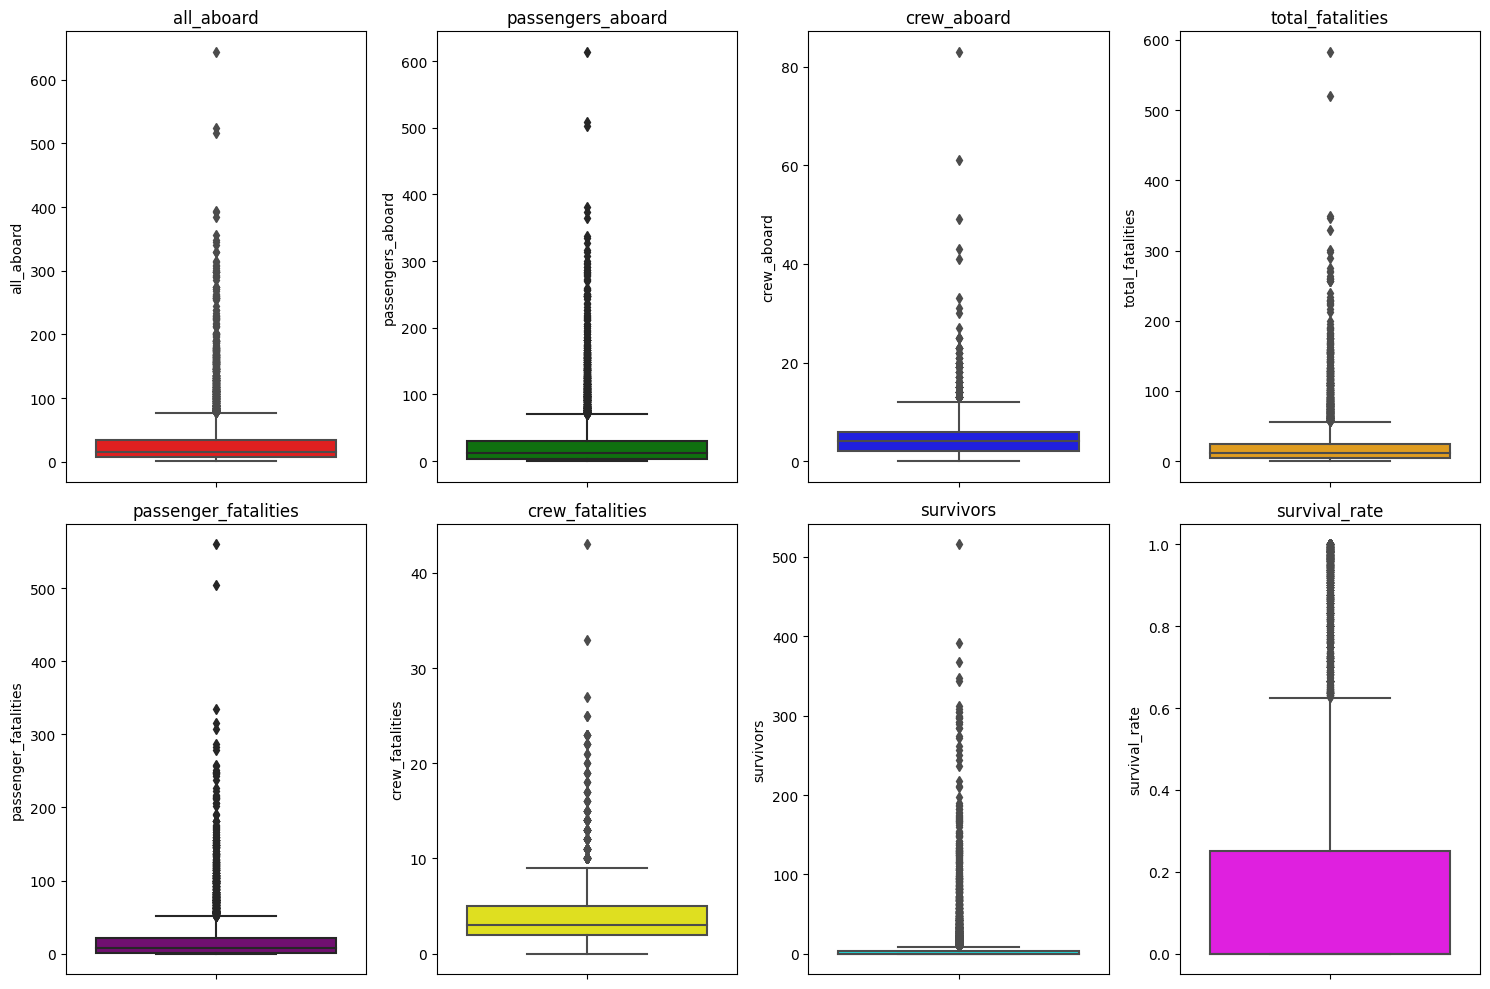

In [167]:
import seaborn as sns

columns = ['all_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passenger_fatalities', 'crew_fatalities', 'survivors', 'survival_rate']
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(y=df[column], color=colors[i])
    plt.title(column)

plt.tight_layout()
plt.show()


## Graficos temporales

### Grafico accidentes por año

In [168]:
df['year'] = df['date'].dt.year

In [169]:
# Realizamod un conteo de accidentes por año
accidentes_por_año = df['year'].value_counts().sort_index(ascending=False)
accidentes_por_año

2021     7
2020     8
2019    13
2018    19
2017    15
        ..
1915     2
1913     3
1912     1
1909     1
1908     1
Name: year, Length: 111, dtype: int64

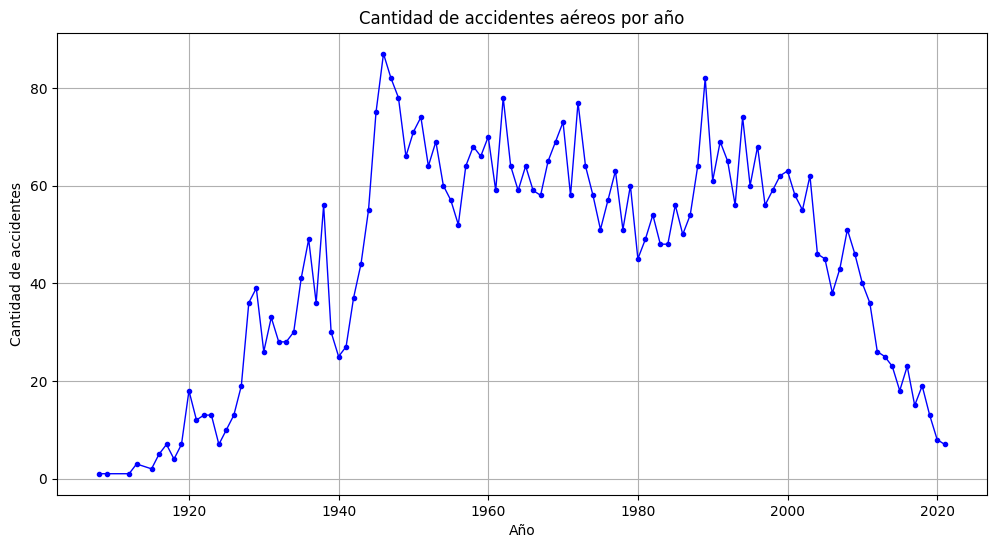

In [170]:
# Hacemos un grafico de linea para visualizar tendencias a lo largo del tiempo
plt.figure(figsize=(12,6))
accidentes_por_año.plot(kind='line',color='blue', marker = ".", linewidth=1)
plt.title('Cantidad de accidentes aéreos por año')
plt.plot()
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.grid(True)
plt.show()

###  Grafico para visualizar la cantidad de accidentes que hubo por mes, dia de la semana y por hora 


C:\Users\agusv\AppData\Local\Temp\ipykernel_18584\1458003692.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


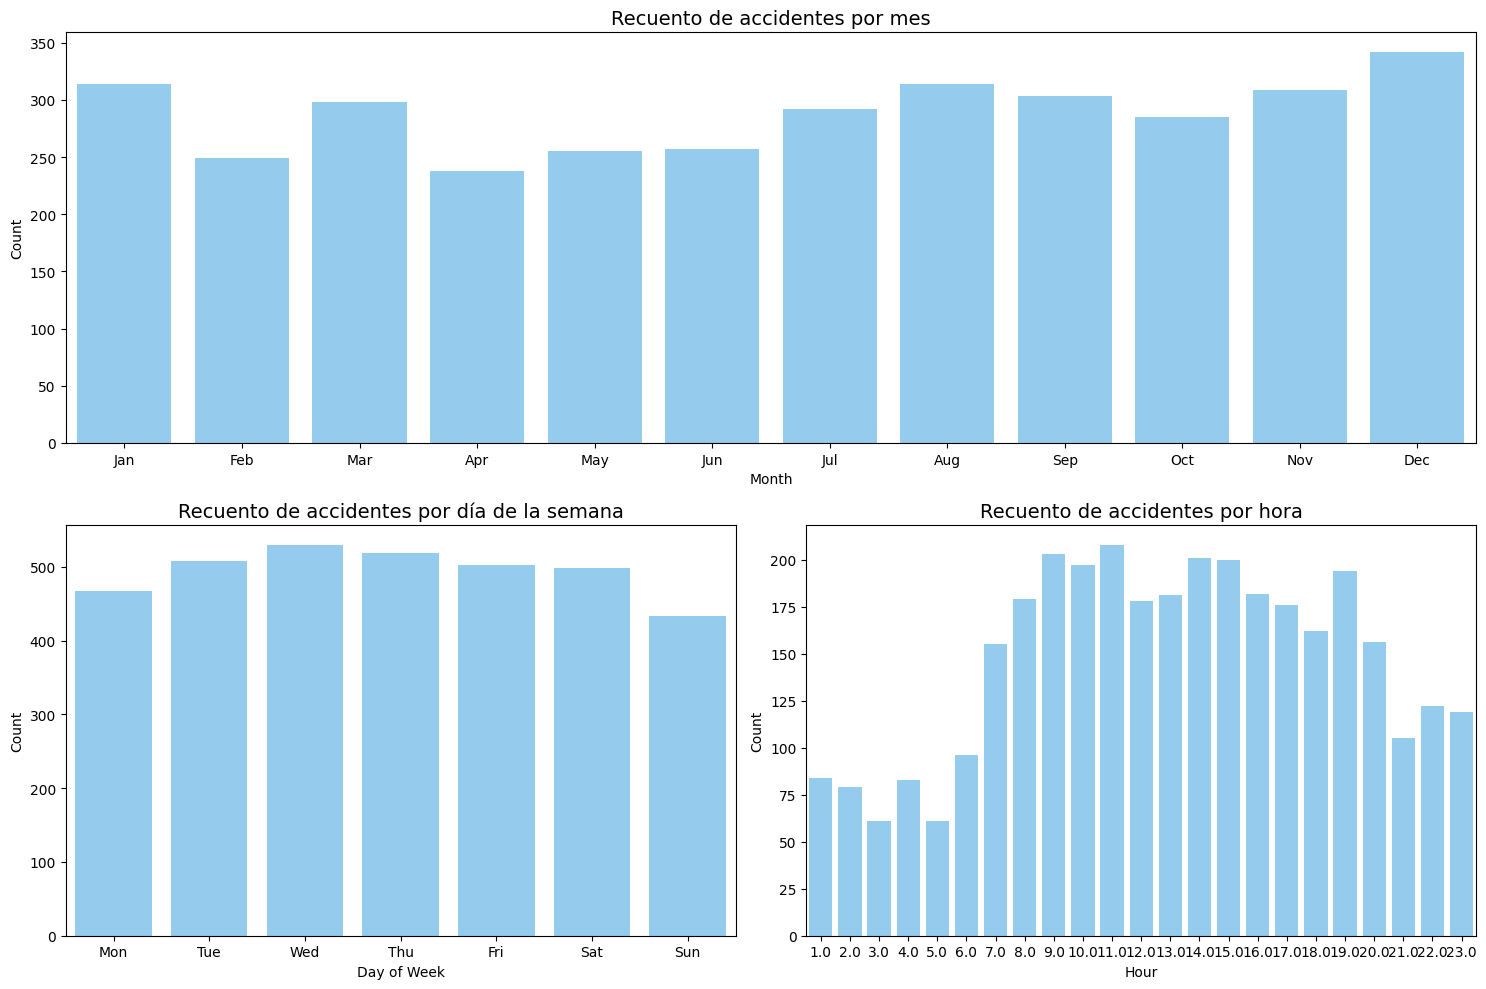

In [171]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-muted')

# Gráfico 1: Conteo de accidentes por meses
ax = plt.subplot(gs[0, :])
data_month = df.groupby(df.date_time.dt.month)[['date']].count()
sns.barplot(x=data_month.index, y='date', data=data_month, color='lightskyblue', linewidth=2)
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(meses)
ax.set_xlim([-0.5, 11.5])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Recuento de accidentes por mes', loc='Center', fontsize=14)

# Gráfico 2: Conteo de accidentes por dia de la semana
ax = plt.subplot(gs[1, 0])
data_weekday = df.groupby(df.date_time.dt.weekday)[['date']].count()
sns.barplot(x=data_weekday.index, y='date', data=data_weekday, color='lightskyblue', linewidth=2)
dias_semana = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(dias_semana)
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Recuento de accidentes por día de la semana', loc='Center', fontsize=14)

# Gráfico 3: Conteo de accidentes por hora
ax = plt.subplot(gs[1, 1])
data_hour = df[df.date_time.dt.hour != 0].groupby(df.date_time.dt.hour)[['date']].count()
sns.barplot(x=data_hour.index, y='date', data=data_hour, color='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Recuento de accidentes por hora', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


### Visualizamos la cantidad de personas a bordo, los sobrevivientes y las que fallecieron

In [172]:
df.columns

Index(['date', 'time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'all_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passenger_fatalities', 'crew_fatalities',
       'summary', 'date_time', 'country', 'city', 'superficie', 'category',
       'brand', 'survivors', 'survival_rate', 'year'],
      dtype='object')

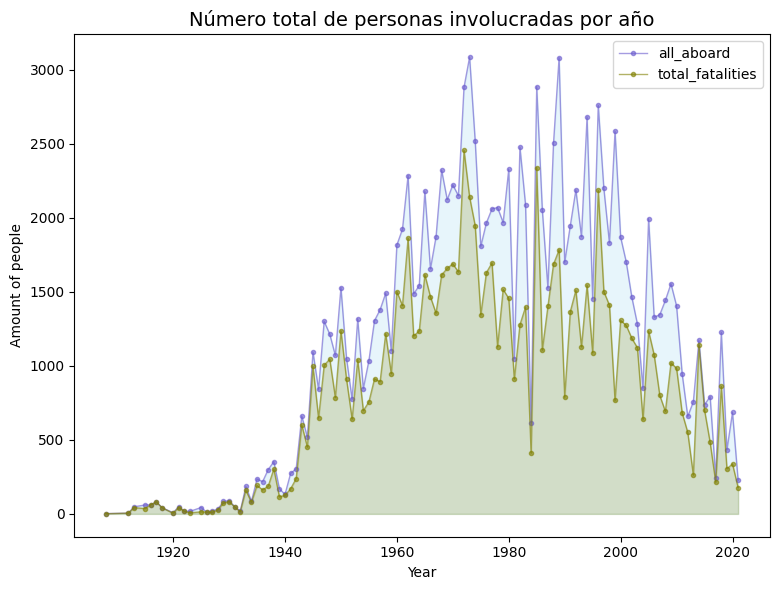

In [173]:
df['total_fatalities'] = pd.to_numeric(df['total_fatalities'])
df['all_aboard'] = pd.to_numeric(df['all_aboard'])

# Agrupamos por año y sumar las columnas necesarias
total_fatalities = df.groupby(df.date_time.dt.year)[['total_fatalities', 'all_aboard']].sum()

# Calculamos la proporción
total_fatalities['proportion'] = total_fatalities['total_fatalities'] / total_fatalities['all_aboard']
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.fill_between(total_fatalities.index, 'all_aboard', data=total_fatalities, color="skyblue", alpha=0.2)
plt.plot(total_fatalities.index, 'all_aboard', data=total_fatalities, marker=".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(total_fatalities.index, 'total_fatalities', data=total_fatalities, color="olive", alpha=0.2)
plt.plot(total_fatalities.index, 'total_fatalities', data=total_fatalities, color="olive", marker=".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Número total de personas involucradas por año', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


## Accidentes

### Operadores con más accidentes

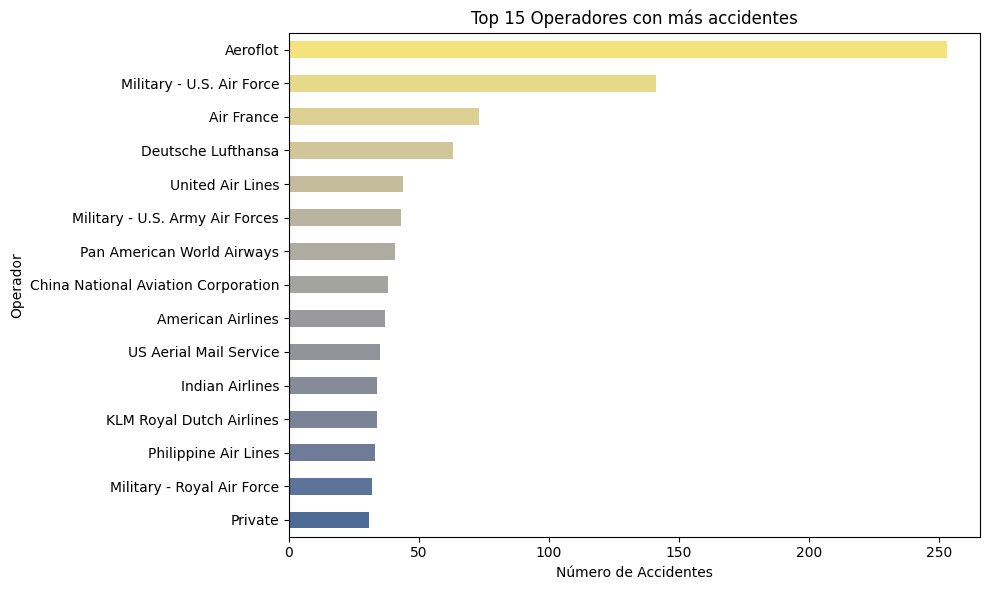

In [174]:
import seaborn as sns

top_operadores = df['airline_operator'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(10, 6))

# Definir un palette de colores
palette = sns.color_palette("cividis", len(top_operadores))

# Gráfico de barras para los operadores con más accidentes
top_operadores.sort_values().plot(kind='barh', ax=ax, color=palette, alpha=0.7)

ax.set_title('Top 15 Operadores con más accidentes')
ax.set_xlabel('Número de Accidentes')
ax.set_ylabel('Operador')

plt.tight_layout()
plt.show()


In [175]:
top_operadores = df['airline_operator'].value_counts().head(15)

# Crear un DataFrame con los datos del top 15 de operadores
top_operadores_df = pd.DataFrame({'Operador': top_operadores.index, 'Cantidad': top_operadores.values})

# Mostrar la tabla de pandas
top_operadores_df


,Operador,Cantidad
0,Aeroflot,253
1,Military - U.S. Air Force,141
2,Air France,73
3,Deutsche Lufthansa,63
4,United Air Lines,44
5,Military - U.S. Army Air Forces,43
6,Pan American World Airways,41
7,China National Aviation Corporation,38
8,American Airlines,37
9,US Aerial Mail Service,35


### Marcas con más accidentes

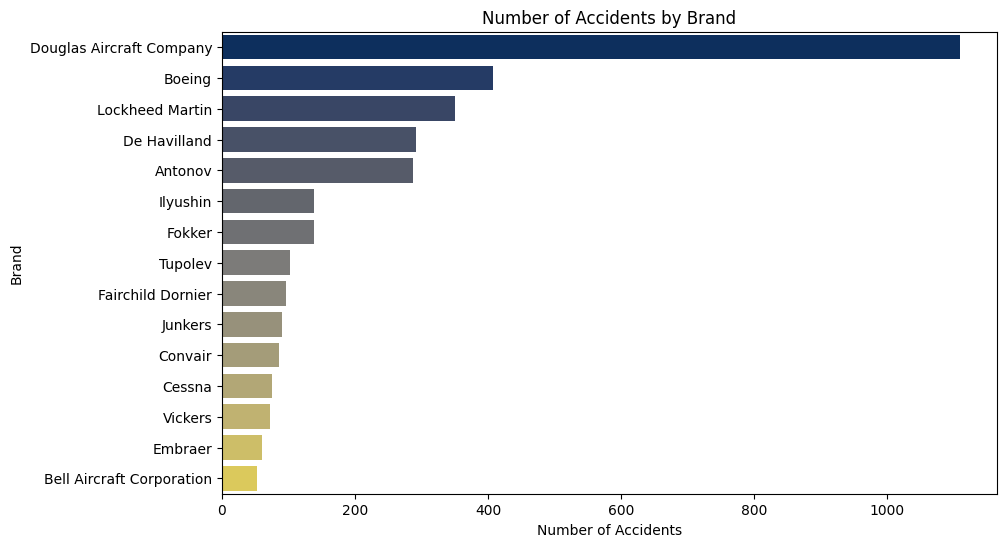

In [176]:

# Cuenta la cantidad de accidentes por marca y ordena en orden descendente
accident_counts = df[df['brand'] != 'other']['brand'].value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))  
sns.barplot(x=accident_counts.values, y=accident_counts.index, palette='cividis') 
plt.xlabel('Number of Accidents') 
plt.ylabel('Brand')  
plt.title('Number of Accidents by Brand') 
plt.show() 

In [177]:
top_brands = df['brand'].value_counts().head(15)

# Creamos un df con los datos del top 15 de operadores
top_brands_df = pd.DataFrame({'Marca': top_brands.index, 'Cantidad': top_brands.values})

top_brands_df


,Marca,Cantidad
0,Douglas Aircraft Company,1109
1,other,966
2,Boeing,407
3,Lockheed Martin,350
4,De Havilland,291
5,Antonov,287
6,Ilyushin,139
7,Fokker,138
8,Tupolev,103
9,Fairchild Dornier,97


### Paises y ciudades con mayor cantidad de accidentes

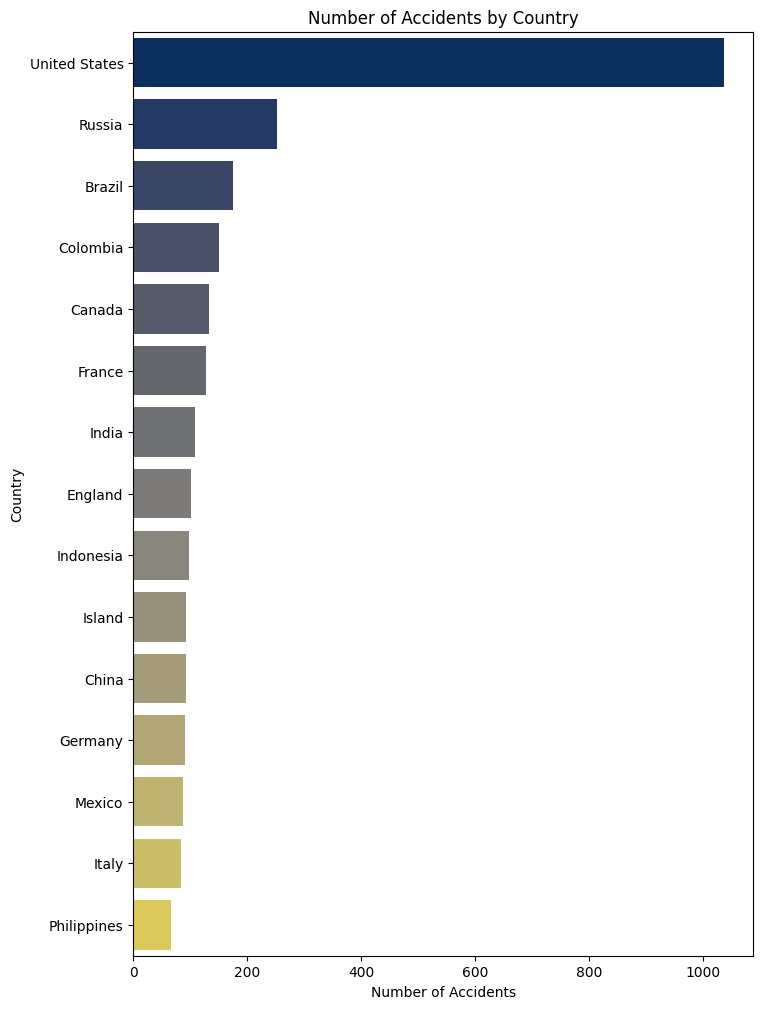

In [178]:
# Filtramos para excluir registros con 'other' en país
df_filtered = df[df['country'] != 'other']

# Cuenta la cantidad de accidentes por país y ordena en orden descendente
accident_counts_country = df_filtered['country'].value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 12))  
sns.barplot(x=accident_counts_country.values, y=accident_counts_country.index, palette='cividis') 
plt.xlabel('Number of Accidents') 
plt.ylabel('Country') 
plt.title('Number of Accidents by Country')  
plt.show()  


In [179]:
accident_counts_country = df['country'].value_counts().sort_values(ascending=False).head(15)
accident_counts_country

United States    1036
other             297
Russia            252
Brazil            175
Colombia          150
Canada            133
France            127
India             109
England           101
Indonesia          97
Island             93
China              92
Germany            90
Mexico             87
Italy              83
Name: country, dtype: int64

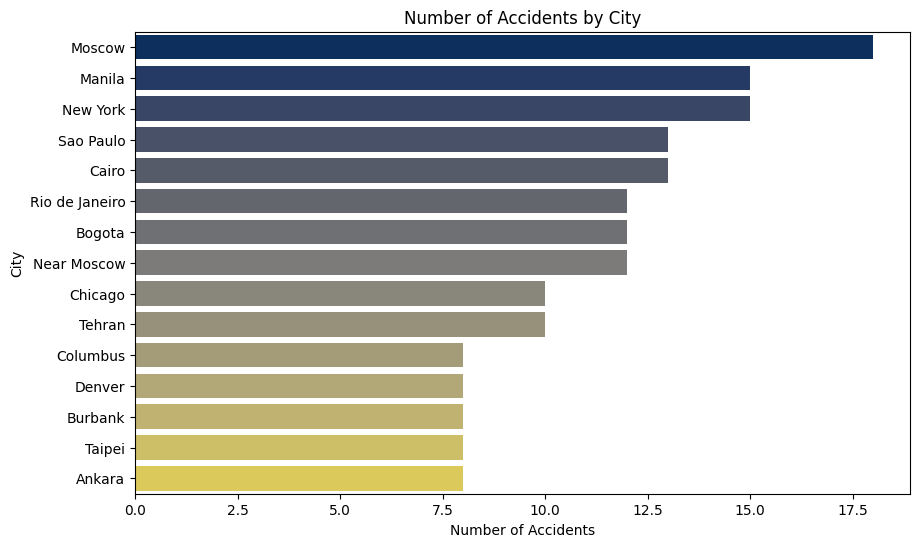

In [180]:
# Excluye 'Atlantic Ocean' y cuenta la cantidad de accidentes por ciudad
accident_counts_city = df[df['city'] != 'Atlantic Ocean']['city'].value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))  
sns.barplot(x=accident_counts_city.values, y=accident_counts_city.index, palette='cividis')
plt.xlabel('Number of Accidents')  
plt.ylabel('City')  
plt.title('Number of Accidents by City')  
plt.show() 

In [181]:
accident_counts_city = df['city'].value_counts().sort_values(ascending=False).head(15)
accident_counts_city

Moscow            18
New York          15
Manila            15
Cairo             13
Sao Paulo         13
Bogota            12
Rio de Janeiro    12
Near Moscow       12
Chicago           10
Atlantic Ocean    10
Tehran            10
London             8
Columbus           8
Rome               8
Taipei             8
Name: city, dtype: int64

## Fallecidos

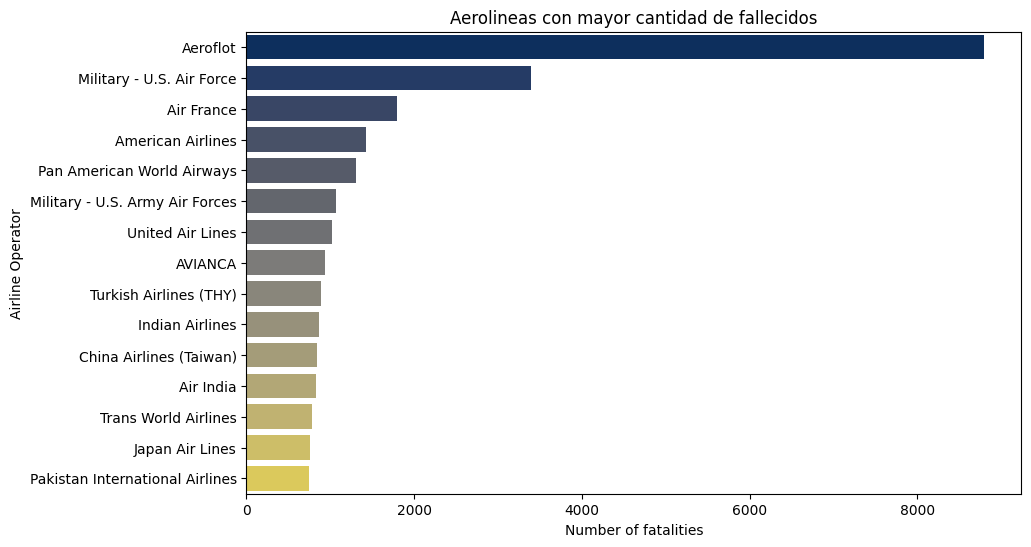

In [182]:
# Sumar el número total de fallecidos por operador
survivor_counts_operator = df.groupby('airline_operator')['total_fatalities'].sum().sort_values(ascending=False)

survivor_counts_operator = survivor_counts_operator[:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=survivor_counts_operator.values, y=survivor_counts_operator.index, palette='cividis')
plt.xlabel('Number of fatalities')
plt.ylabel('Airline Operator')
plt.title('Aerolineas con mayor cantidad de fallecidos')
plt.show()

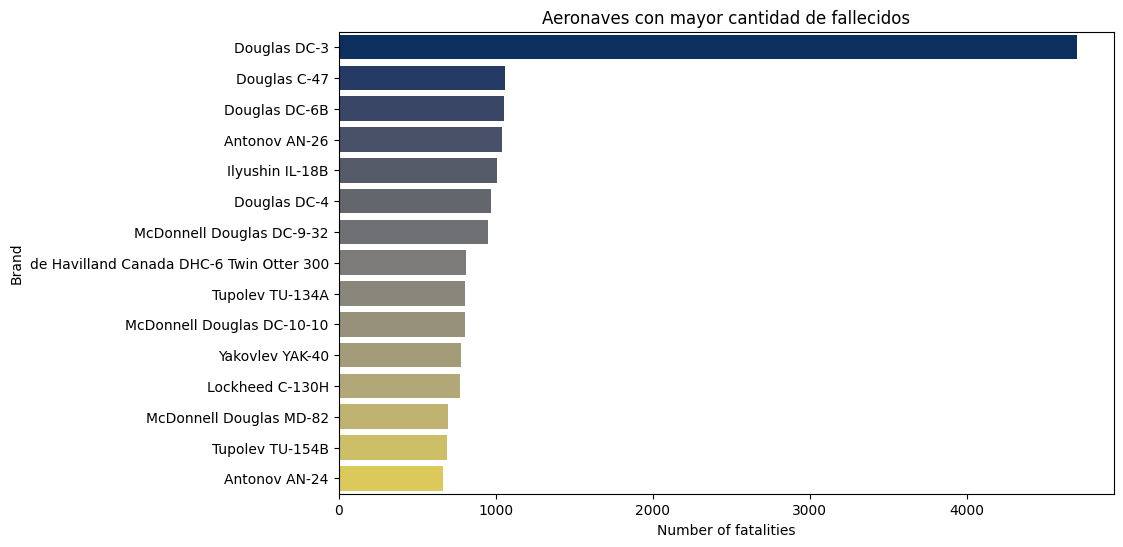

In [183]:
# Sumamos el número total de fallecidos por marca
survivor_counts_brand = df.groupby('aircraft_type')['total_fatalities'].sum().sort_values(ascending=False)

# Limitamos el gráfico a las 15 marcas con más fallecidos
survivor_counts_brand = survivor_counts_brand[:15]

plt.figure(figsize=(10, 6)) 
sns.barplot(x=survivor_counts_brand.values, y=survivor_counts_brand.index, palette='cividis')  
plt.xlabel('Number of fatalities')  
plt.ylabel('Brand')  
plt.title('Aeronaves con mayor cantidad de fallecidos')  
plt.show() 


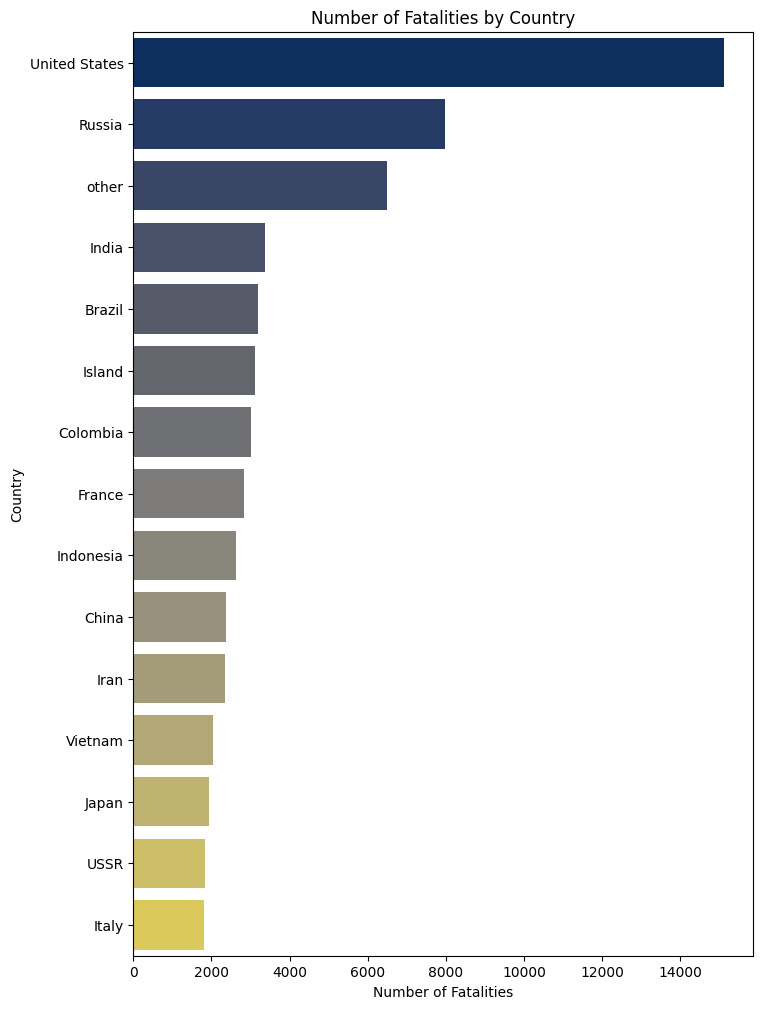

In [184]:
# Excluimos 'Other' de los datos
df_no_other = df[df['country'] != 'Other']

# Sumamos el número total de fatalidades por país
fatalities_counts_country = df_no_other.groupby('country')['total_fatalities'].sum()

# Ordenamos de mayor a menor y seleccionamos los 15 países con más fatalidades
top15_fatalities_country = fatalities_counts_country.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 12))  
sns.barplot(x=top15_fatalities_country.values, y=top15_fatalities_country.index, palette='cividis')  
plt.xlabel('Number of Fatalities') 
plt.ylabel('Country')  
plt.title('Number of Fatalities by Country')
plt.show()  

## Seguridad

### Aerolineas mas seguras

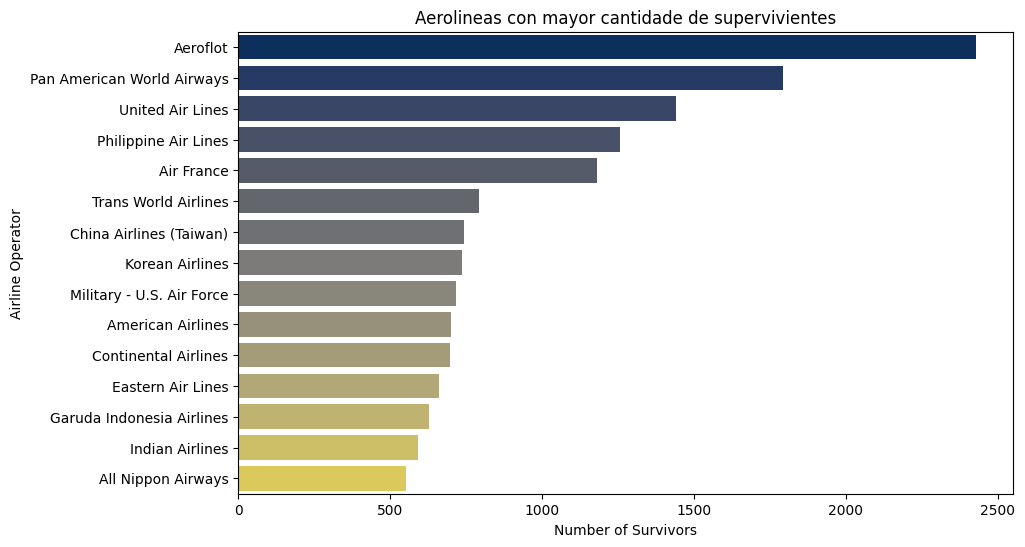

In [185]:
# Sumamos el número total de sobrevivientes por operador
survivor_counts_operator = df.groupby('airline_operator')['survivors'].sum().sort_values(ascending=False)

survivor_counts_operator = survivor_counts_operator[:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=survivor_counts_operator.values, y=survivor_counts_operator.index, palette='cividis')
plt.xlabel('Number of Survivors')
plt.ylabel('Airline Operator')
plt.title('Aerolineas con mayor cantidade de supervivientes')
plt.show()

### Marcas mas seguras

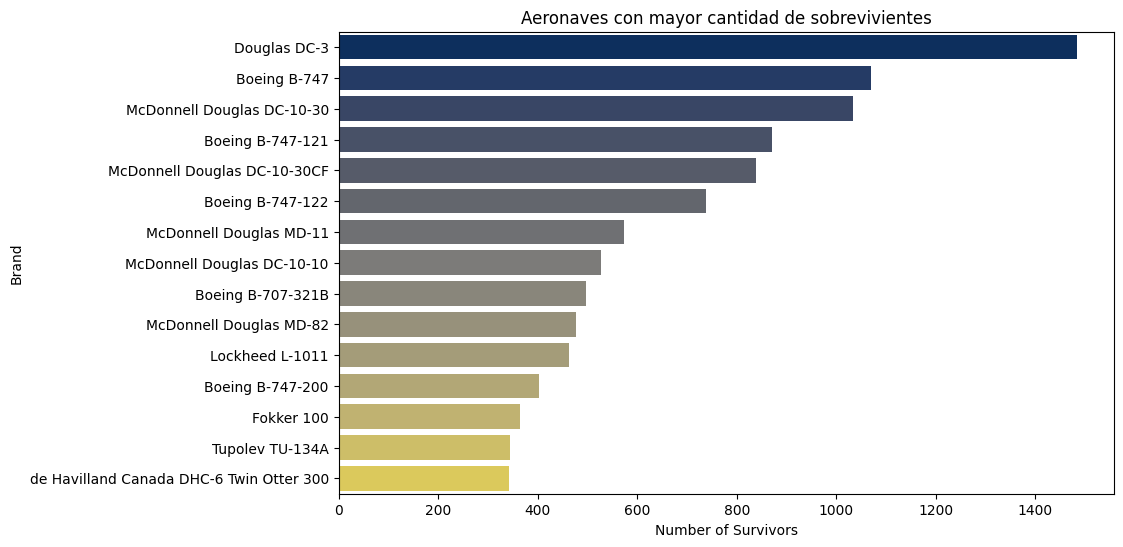

In [186]:
# Sumamos el número total de sobrevivientes por marca
survivor_counts_brand = df.groupby('aircraft_type')['survivors'].sum().sort_values(ascending=False)

# Limitamos el gráfico a las 15 marcas con más sobrevivientes
survivor_counts_brand = survivor_counts_brand[:15]

plt.figure(figsize=(10, 6)) 
sns.barplot(x=survivor_counts_brand.values, y=survivor_counts_brand.index, palette='cividis')  
plt.xlabel('Number of Survivors')  
plt.ylabel('Brand') 
plt.title('Aeronaves con mayor cantidad de sobrevivientes')  
plt.show() 


In [187]:
# Podemos observar que el avion con mayor cantidad de fatalidades tambien es el avion con mayor cantidad de sobrevivientes

### Paises con mayor tasa de supervivencia

In [188]:
# Agregamos los datos por país y calculamos la media de la tasa de supervivencia
country_data = df.groupby('country').agg({'survival_rate': 'mean'})

# Ordena los países por la tasa de supervivencia media
country_data = country_data.sort_values('survival_rate', ascending=False)

# Muestra los primeros 10 países con la mayor tasa de supervivencia media
print('Paises con mayor tasa de supervivencia',country_data.head(10))


Paises con mayor tasa de supervivencia             survival_rate
country                  
Micronesia       0.978723
Ghana            0.945027
Qatar            0.645001
Luxembourg       0.500000
Kuwait           0.484043
Slovenia         0.456197
Paraguay         0.451259
Barbados         0.450000
Zimbabwe         0.448022
Liberia          0.436190


## Tipo de vuelo

In [189]:
df.airline_operator = df.airline_operator.str.upper()

### Pasajeros o Militar

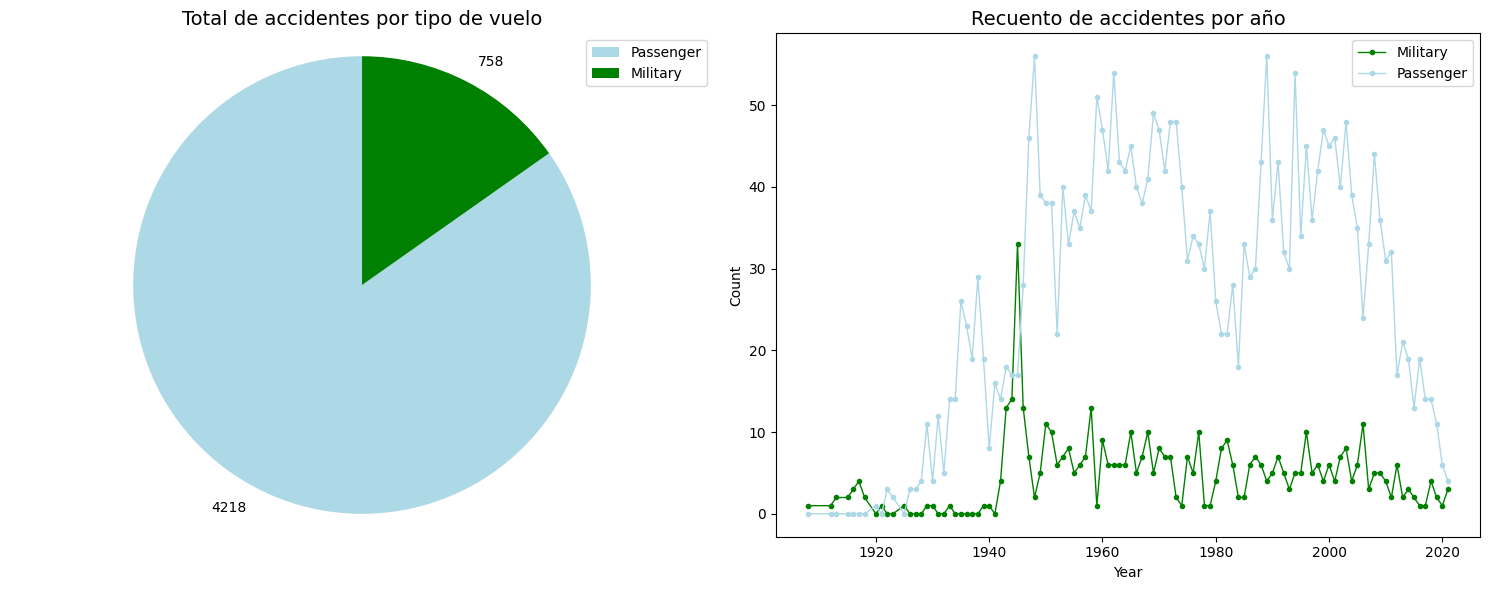

In [190]:
Temp = df.copy()
Temp['isMilitary'] = Temp['airline_operator'].str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = df.copy()
Temp2['Military'] = Temp2['airline_operator'].str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['date_time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.date_time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['lightblue', 'green']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total de accidentes por tipo de vuelo', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='green', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='lightblue', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Recuento de accidentes por año', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()


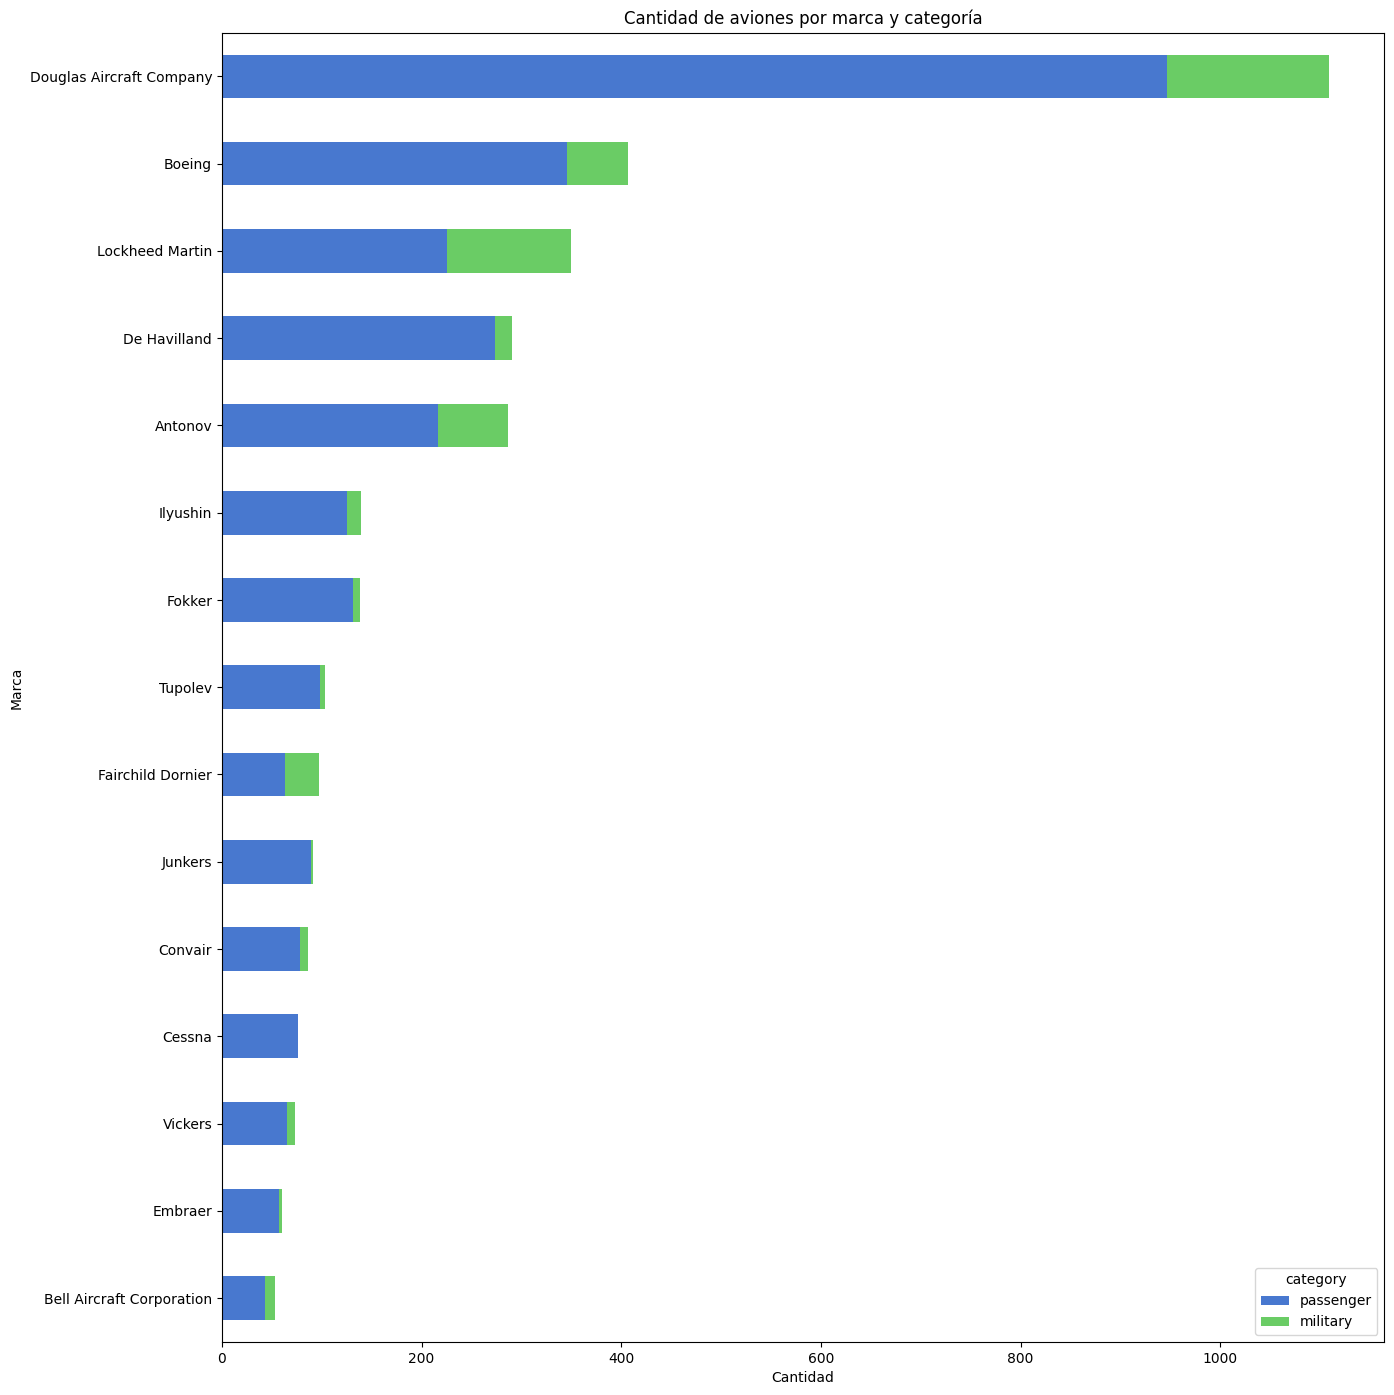

In [191]:
# Primero, reagrupamos los datos para que sean más fácil de plotear
data_to_plot = df.groupby(['brand', 'category']).size().unstack().fillna(0)

# Sumamo las filas para obtener el total de accidentes por marca
data_to_plot['total_accidents'] = data_to_plot.sum(axis=1)

# Selecciona las quince marcas con más accidentes excluyendo 'other'
data_to_plot = data_to_plot[data_to_plot.index != 'other'].nlargest(15, 'total_accidents')

# Ordena el DataFrame por 'total_accidents' de manera ascendente
data_to_plot = data_to_plot.sort_values('total_accidents')

# Elimina la columna 'total_accidents' que ya no necesitamos
data_to_plot = data_to_plot.drop(columns='total_accidents')

data_to_plot = data_to_plot.iloc[:, ::-1]

ax = data_to_plot.plot(kind='barh', stacked=True, figsize=(15, 17))  

plt.title('Cantidad de aviones por marca y categoría')
plt.ylabel('Marca')  
plt.xlabel('Cantidad')


plt.show()


#### Podemos analizar que tanto Douglas Aircraft Company y Lockheed Martin eran los que tuvieron mayor cantidad de aviones militares. Esto hace que Lockheed Martin se encuentre en el top tres de marcas con más accidentes, ya qué, si solo tomaramos los aviones para pasajeros esta marca no deberia estar tan arriba.

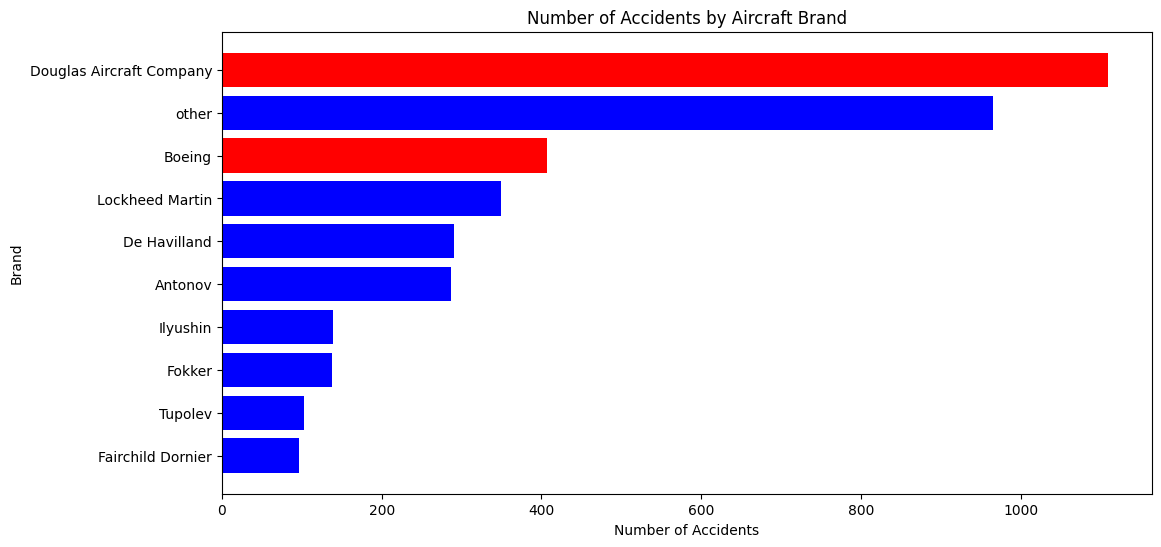

In [192]:
import matplotlib.pyplot as plt

# Agrupamos los datos por marca y contamos el número de accidentes
accidentes_por_marca = df['brand'].value_counts()

# Ordenar los valores en orden descendente y seleccionar las 15 primeras marcas
accidentes_por_marca = accidentes_por_marca.sort_values(ascending=True).tail(10)

# Crear una lista de marcas a resaltar
marcas_resaltadas = ['Douglas Aircraft Company', 'Boeing']

# Establecer el color a 'red' para las marcas resaltadas y a 'blue' para las demás
colores = ['red' if marca in marcas_resaltadas else 'blue' for marca in accidentes_por_marca.index]

plt.figure(figsize=(12,6))
plt.barh(accidentes_por_marca.index, accidentes_por_marca.values, color=colores)
plt.xlabel('Number of Accidents')
plt.ylabel('Brand')
plt.title('Number of Accidents by Aircraft Brand')
plt.yticks(rotation=0)
plt.show()


#### Douglas Aircraft Company se fusionó con McDonnell Aircraft en 1967 para formar McDonnell Douglas. Más tarde, en 1997, McDonnell Douglas fue adquirida por Boeing.

### Tasa de supervivencia segun superficie

In [193]:
# Calcular las estadísticas descriptivas para cada grupo 
df.groupby('superficie')['survival_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
superficie,,,,,,,,
False,4896.0,0.182945,0.312338,0.0,0.0,0.0,0.250000,1.0
True,90.0,0.146670,0.310301,0.0,0.0,0.0,0.027778,1.0


#### Descripción:
* count: Hay 4896 accidentes que no ocurrieron sobre una superficie de agua y 90 que sí lo hicieron
* mean: Para los accidentes que ocurrieron fuera del agua, la tasa de supervivencia promedio es aproximadamente del 18.3%, mientras que para los que ocurrieron sobre el agua es aproximadamente del 14.7%.
* desviación estándar: Similar para ambos grupos
* Los percentiles de los datos, indican la distribución de las tasas de supervivencia dentro de cada grupo
La tasa media de supervivencia es ligeramente más baja para los accidentes que ocurren sobre el agua en comparación con los que ocurren en tierra, aunque la diferencia no es muy grande.


## Que aviones compraron las aerolineas 

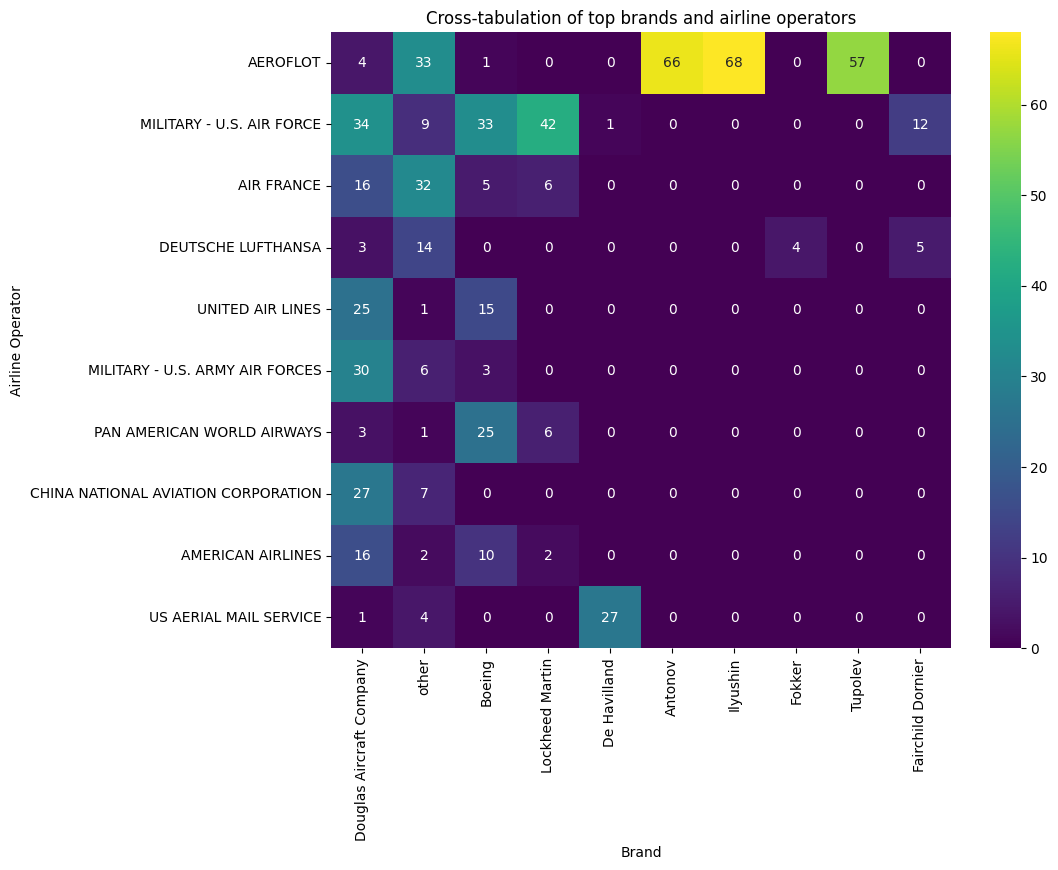

In [ ]:
import seaborn as sns

# Seleccionamos las 10 aerolíneas con más accidentes
top_airlines = df['airline_operator'].value_counts().head(10)

# Seleccionamos las 10 marcas con más accidentes
top_brands = df['brand'].value_counts().head(10)

# Filtramos para incluir sólo las aerolíneas y marcas seleccionadas
filtered_df = df[df['airline_operator'].isin(top_airlines.index) & df['brand'].isin(top_brands.index)]

# Creamos una tabla cruzada con los datos filtrados
cross_tab = pd.crosstab(filtered_df['airline_operator'], filtered_df['brand'])

cross_tab = cross_tab.loc[top_airlines.index, top_brands.index]

# Genera un mapa de calor a partir de la tabla cruzada
plt.figure(figsize=(10,8))
sns.heatmap(cross_tab, cmap='viridis', annot=True, cbar=True, fmt='d')
plt.title('Cross-tabulation of top brands and airline operators')
plt.xlabel('Brand')
plt.ylabel('Airline Operator')
plt.show()


## KPIS

### Reducir en un 5% la tasa anual

In [ ]:
# Calculamos la tasa de mortalidad total
total_death_rate = df['total_fatalities'].sum() / df['all_aboard'].sum()

print('La tasa de mortalidad total es:', total_death_rate)

La tasa de mortalidad total es: 0.717181927043766


In [ ]:
# Primero, necesitamos calcular la tasa de mortalidad anual
df['year'] = df['date'].dt.year  # Agrega una columna de año al DataFrame
annual_mortality_rates = df.groupby('year').apply(lambda x: x['total_fatalities'].sum() / x['all_aboard'].sum()).reset_index(name='mortality_rate')

# A continuación, calculamos la reducción año tras año en la tasa de mortalidad
annual_mortality_rates['year_on_year_reduction'] = annual_mortality_rates['mortality_rate'].pct_change()

# Ahora podemos filtrar para ver los años en los que logramos una reducción del 5% en la tasa de mortalidad
years_with_5_percent_reduction = annual_mortality_rates[annual_mortality_rates['year_on_year_reduction'] <= -0.05]

# Imprimir los años con una reducción del 5%
print(years_with_5_percent_reduction)

conteo = years_with_5_percent_reduction.shape[0]
print()
print("Cantidad de años en los que se cumple el kpi:",conteo)


     year  mortality_rate  year_on_year_reduction
3    1913        0.877551               -0.122449
4    1915        0.600000               -0.316279
9    1920        0.781250               -0.218750
14   1925        0.539683               -0.460317
18   1929        0.747191               -0.113950
23   1934        0.800000               -0.079612
24   1935        0.628866               -0.213918
26   1937        0.599045               -0.164431
28   1939        0.746667               -0.103664
30   1941        0.682266               -0.207169
33   1944        0.862697               -0.062600
35   1946        0.804730               -0.122006
36   1947        0.745743               -0.073300
38   1949        0.715252               -0.120212
41   1952        0.804707               -0.086443
44   1955        0.725179               -0.132511
45   1956        0.661323               -0.088056
50   1961        0.729691               -0.098719
56   1967        0.743128               -0.123795


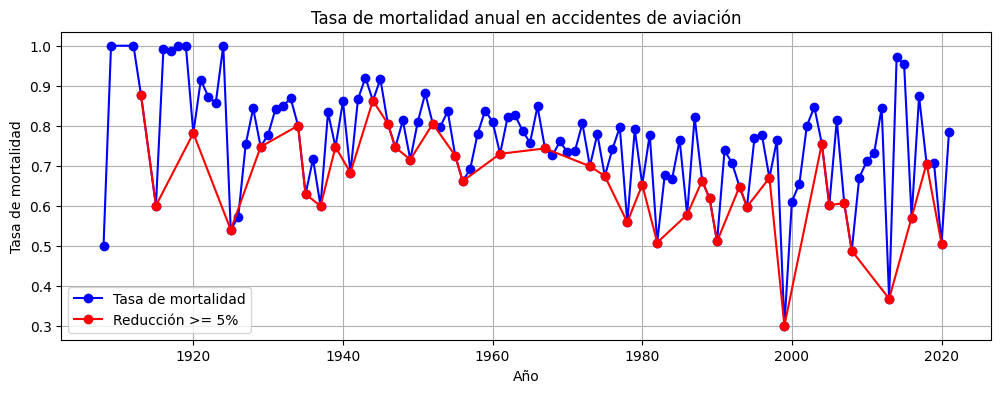

In [ ]:
plt.figure(figsize=(12, 4))

# Primero, trazamos la tasa de mortalidad anual
plt.plot(annual_mortality_rates['year'], annual_mortality_rates['mortality_rate'], marker='o', label='Tasa de mortalidad', color='blue')

# Ahora, la tasa de mortalidad en los años en los que se logró una reducción del 5% o más
years_with_5_percent_reduction = annual_mortality_rates[annual_mortality_rates['year_on_year_reduction'] <= -0.05]
plt.plot(years_with_5_percent_reduction['year'], years_with_5_percent_reduction['mortality_rate'], marker='o', label='Reducción >= 5%', color='red')

plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.title('Tasa de mortalidad anual en accidentes de aviación')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
years_with_5_percent_reduction

,year,mortality_rate,year_on_year_reduction
3,1913,0.877551,-0.122449
4,1915,0.600000,-0.316279
9,1920,0.781250,-0.218750
14,1925,0.539683,-0.460317
18,1929,0.747191,-0.113950
23,1934,0.800000,-0.079612
24,1935,0.628866,-0.213918
26,1937,0.599045,-0.164431
28,1939,0.746667,-0.103664
30,1941,0.682266,-0.207169


Este gráfico ilustra la tasa de mortalidad anual en accidentes de aviación desde el año 1908 hasta el año 2021. La tasa de mortalidad se calcula como el porcentaje de personas que mueren en accidentes de aviación en comparación con el número total de personas a bordo en los vuelos que tuvieron accidentes cada año.

La línea azul muestra la tendencia general en la tasa de mortalidad a lo largo del tiempo. En general, podemos observar que ha habido fluctuaciones, es decir, que la tasa de mortalidad ha experimentado altibajos, subiendo en algunos años y bajando en otros.Estas fluctuaciones pueden deberse a una variedad de factores, como cambios en las prácticas de seguridad, la introducción de nuevas tecnologías, etc.

La línea roja representa los años en los que se logró una reducción del 5% o más en la tasa de mortalidad en comparación con el año anterior. Estos son los años en los que se cumplió nuestro indicador clave de rendimiento (KPI) de reducir la tasa de mortalidad en un 5% anual. Podemos ver que hubo 40 años durante el período estudiado en los que se logró esta meta.

Por lo tanto, este gráfico nos brinda una visión general de cómo ha cambiado la seguridad de los vuelos a lo largo del tiempo y cómo hemos progresado en términos de nuestro objetivo de reducir la tasa de mortalidad.

### Reducir en un 5% la tasa de accidentes en Estados Unidos, país con mas cantidad de accidentes

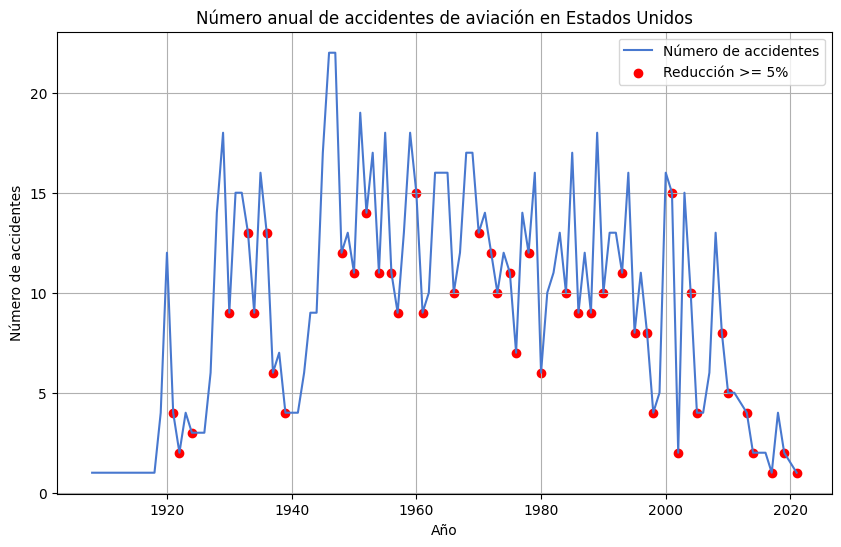

In [ ]:
# Filtramos los datos para solo incluir accidentes en Estados Unidos
us_accidents = df[df['country'] == 'United States']

# Calculamos la tasa anual de accidentes
annual_accidents = us_accidents['year'].value_counts().sort_index()

# Calculamos el cambio porcentual año tras año
annual_accidents_pct_change = annual_accidents.pct_change()

# Resaltamos los años con una reducción del 5%
highlight = annual_accidents_pct_change <= -0.05

plt.figure(figsize=(10, 6))
plt.plot(annual_accidents.index, annual_accidents.values, label='Número de accidentes')
plt.scatter(annual_accidents[highlight].index, annual_accidents[highlight].values, color='red', label='Reducción >= 5%')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número anual de accidentes de aviación en Estados Unidos')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Contar el número de años en los que se cumplió el KPI
num_years_kpi_met = highlight.sum()

print("El KPI de reducción del 5% en la tasa de accidentes se cumplió en {} años.".format(num_years_kpi_met))

El KPI de reducción del 5% en la tasa de accidentes se cumplió en 44 años.


El gráfico muestra la tasa de accidentes aéreos en Estados Unidos desde el inicio de los registros hasta la fecha actual. La línea azul representa la tasa general de accidentes por año, mientras que los puntos rojos representan los años en los que logramos una reducción anual del 5% en la tasa de accidentes.

Este KPI se estableció con el objetivo de mejorar continuamente la seguridad de los vuelos en Estados Unidos, reduciendo la tasa de accidentes en al menos un 5% cada año. Podemos observar que, a lo largo de los años, hubo varios períodos en los que se logró este objetivo, lo que indica que se realizaron mejoras significativas en la seguridad de los vuelos.

También podemos observar que hubo años en los que no se logró el objetivo. Estos son los años en los que debemos centrarnos para entender qué factores contribuyeron a la falta de reducción en la tasa de accidentes, y utilizar esta información para guiar nuestras acciones futuras para mejorar la seguridad de los vuelos.

El número total de veces que se cumplió el KPI a lo largo de los años es de 44. Si bien esto es un indicativo de progreso, nuestro objetivo debe ser asegurarnos de que el KPI se cumpla de manera consistente cada año."

### KPI basado en la frecuencia de palabras clave

#### Bag of words

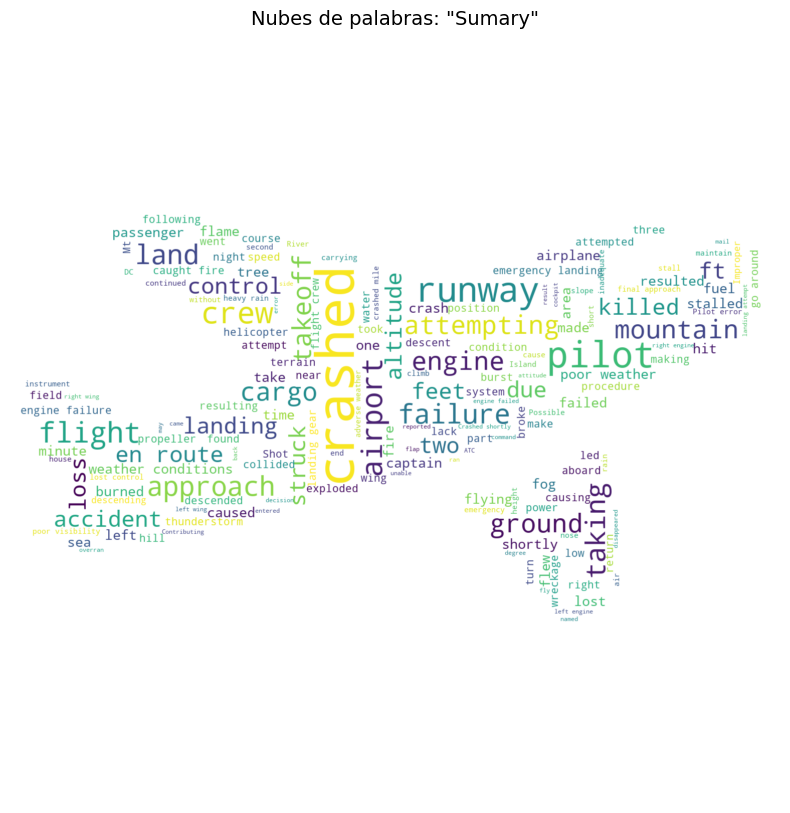

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df['summary'].tolist())

plane_mask = np.array(Image.open('airplane-word-cloud-flight.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2500, max_font_size=35, scale=3, mask=plane_mask,
                stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Nubes de palabras: "Sumary"', loc='Center', fontsize=14)
plt.show()

In [ ]:
word_list = wc.words_
print(word_list)

{'crashed': 1.0, 'pilot': 0.36908962597035994, 'runway': 0.3412138320395201, 'crew': 0.2607621736062103, 'flight': 0.23570924488355682, 'airport': 0.23500352858151025, 'failure': 0.21524347212420608, 'taking': 0.21312632321806635, 'approach': 0.21242060691601977, 'land': 0.20324629498941427, 'takeoff': 0.1806633733239238, 'engine': 0.17466478475652789, 'cargo': 0.17466478475652789, 'ground': 0.1714890613973183, 'attempting': 0.1707833450952717, 'mountain': 0.16725476358503882, 'struck': 0.1372618207480593, 'en route': 0.1365561044460127, 'accident': 0.13479181369089627, 'due': 0.13479181369089627, 'control': 0.13232180663373325, 'altitude': 0.12385321100917432, 'landing': 0.11785462244177841, 'ft': 0.11609033168666197, 'loss': 0.1150317572335921, 'killed': 0.11256175017642908, 'feet': 0.10691601976005646, 'two': 0.10515172900494002, 'weather conditions': 0.10197600564573042, 'flying': 0.10127028934368384, 'caused': 0.0995059985885674, 'shortly': 0.09915314043754411, 'captain': 0.097388

In [ ]:
categories = {
    'despegue_y_aterrizaje': ['attempting', 'approach', 'takeoff', 'landing', 'runway', 'taking'],
    'terreno': ['ground', 'mountain', 'collided', 'struck', 'altitude', 'ft', 'feet', 'area', 'sea', 'tree', 'water'],
    'fatalidades': ['killed', 'burned', 'crash'],
    'fallas_mecanicas': ['engine', 'failure', 'engine failure', 'fire', 'flame', 'fuel', 'broke'],
    'condiciones_meteorológicas': ['weather conditions', 'fog', 'poor weather'],
    'errores_de_navegación': ['en route', 'flying', 'lost', 'control', 'stalled', 'flew'],
    'tripulación': ['crew', 'pilot', 'captain'],
    'accidentes_graves': ['crashed', 'emergency landing', 'accident'],
    'transporte': ['flight', 'airport', 'cargo', 'airplane', 'helicopter']
}


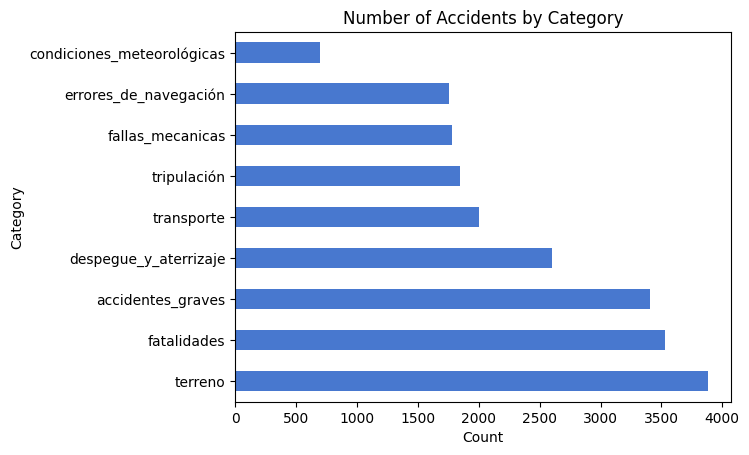

In [ ]:
# Crear un diccionario para almacenar los conteos de cada categoría
category_counts = {category: 0 for category in categories}

# Iterar a través de cada resumen
for summary in df['summary']:
    # Convertir el resumen en minúsculas para una comparación de cadenas de texto consistentes
    summary = summary.lower()

    # Iterar a través de cada categoría y sus palabras clave
    for category, keywords in categories.items():
        # Si alguna de las palabras clave aparece en el resumen, incrementar el conteo para esa categoría
        if any(keyword in summary for keyword in keywords):
            category_counts[category] += 1

# Crear un DataFrame a partir de los conteos de cada categoría
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['count'])

# Ordenar el DataFrame en orden descendente
category_df = category_df.sort_values(by='count', ascending=False)

# Crear un gráfico de barras para mostrar los conteos de cada categoría
category_df.plot(kind='barh', legend=False)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Number of Accidents by Category')
plt.show()


El KPI que se muestra en este análisis es la frecuencia de palabras clave en los resúmenes de accidentes, agrupadas en nueve categorías distintas. Las categorías fueron creadas para entender mejor las circunstancias que rodean a los accidentes aéreos. La interpretación de las categorías y su frecuencia proporciona información valiosa sobre los factores más comunes en los accidentes de aviación.

La categoría "terreno" es la más frecuente, lo que sugiere que el entorno físico juega un papel crucial en los accidentes de aviación. Esto puede implicar colisiones con montañas, aterrizajes en tierra, entre otros factores relacionados con el terreno.

"Fatalidades" y "accidentes graves" son la segunda y tercera categorías más comunes respectivamente, lo que indica una alta tasa de accidentes con consecuencias severas, incluyendo la pérdida de vidas y accidentes con daños significativos en la aeronave.

"Despegue y aterrizaje" y "transporte" son la cuarta y quinta categorías más comunes, respectivamente, lo que sugiere que muchos de los accidentes ocurren durante estas fases del vuelo.

La "tripulación" está en sexto lugar, lo que indica que los errores de la tripulación o los problemas con la tripulación pueden ser factores significativos en algunos accidentes.

Las "fallas mecánicas", "errores de navegación" y "condiciones meteorológicas" están en las últimas posiciones, lo que podría indicar que estos factores son menos comunes en los accidentes de aviación. Sin embargo, aún pueden ser áreas importantes para la prevención de accidentes.

Este análisis puede ayudar a las autoridades de aviación a identificar áreas clave para mejorar la seguridad en la aviación. Por ejemplo, pueden tomar medidas para mejorar la formación de los pilotos en la navegación terrestre y en las maniobras de despegue y aterrizaje, o pueden poner más énfasis en el mantenimiento de la aeronave para prevenir fallas mecánicas.

## tasa de supervivencia en aerolineas con alta siniestralidad

In [ ]:
# En caso de que los datos tengan celdas vacías o nulas, rellénalas con cero
df['total_fatalities'] = df['total_fatalities'].fillna(0)

# Calcular el índice de fatalidad
df['fatality_index'] = df['total_fatalities'] / df['all_aboard']

# Calcular la tasa de supervivencia
df['survival_rate'] = 1 - df['fatality_index']

# Filtrar a las aerolíneas con alta siniestralidad
high_accident_airlines = df['airline_operator'].value_counts().nlargest(10).index
df_high_accident = df[df['airline_operator'].isin(high_accident_airlines)]

# Calcular la tasa de supervivencia promedio anual para estas aerolíneas
annual_survival_rate = df_high_accident.groupby('year')['survival_rate'].mean()


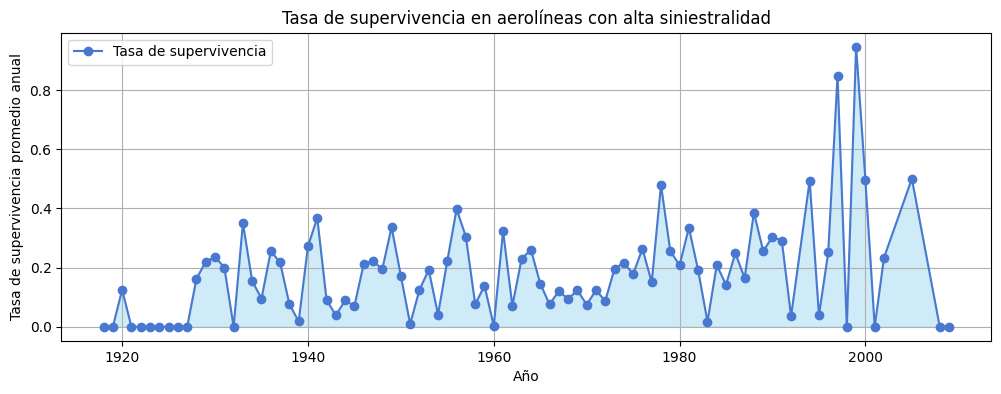

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(annual_survival_rate.index, annual_survival_rate, marker='o', label='Tasa de supervivencia')

plt.fill_between(annual_survival_rate.index, annual_survival_rate, color='skyblue', alpha=0.4)

plt.xlabel('Año')
plt.ylabel('Tasa de supervivencia promedio anual')
plt.title('Tasa de supervivencia en aerolíneas con alta siniestralidad')
plt.legend()

# Anota un año específico o evento
# plt.annotate('Evento importante', xy=(1995, 0.8), xytext=(1992, 0.6), arrowprops=dict(facecolor='red', shrink=0.05))

plt.grid(True)
plt.show()


Este KPI es una medida de la tasa promedio de supervivencia en accidentes de aviación para las aerolíneas que han tenido una alta tasa de accidentes (alta siniestralidad). Se calcula como el promedio de las tasas de supervivencia de cada accidente registrado para esas aerolíneas.

La tasa de supervivencia para un accidente en particular se calcula como el número de supervivientes dividido por el número total de personas a bordo. Esto se traduce en un valor entre 0 y 1, donde 1 significa que todos a bordo sobrevivieron al accidente, mientras que 0 significa que no hubo supervivientes.

Para este KPI, primero se identifican las aerolíneas con la mayor cantidad de accidentes. Luego, para estas aerolíneas, se calcula la tasa de supervivencia promedio. Este KPI es útil para identificar qué aerolíneas con alta siniestralidad están manejando mejor las situaciones de accidentes en términos de preservar la vida humana.

La visualización de este KPI proporciona información sobre las tendencias a lo largo del tiempo en términos de la tasa de supervivencia en accidentes, y también resalta específicamente las aerolíneas con alta siniestralidad.

## Diccionario del df modificado

* date: La fecha del accidente de aviación.
* time: La hora del día en que ocurrió el accidente.
* location: La ubicación general del accidente.
* airline_operator: La aerolínea o el operador de la aeronave en el momento del accidente.
* flight_no: El número de vuelo de la aeronave accidentada.
* route: La ruta programada para el vuelo.
* aircraft_type: El tipo de aeronave involucrada en el accidente.
* all_aboard: El número total de personas a bordo de la aeronave en el momento del accidente.
* passengers_aboard: El número de pasajeros a bordo de la aeronave en el momento del accidente.
* crew_aboard: El número de tripulantes a bordo de la aeronave en el momento del accidente.
* total_fatalities: El número total de muertes resultantes del accidente.
* passenger_fatalities: El número de muertes de pasajeros resultantes del accidente.
* crew_fatalities: El número de muertes de la tripulación resultantes del accidente.
* summary: Un resumen o descripción del accidente.
* date_time: Una combinación de la fecha y la hora del accidente.
* country: El país donde ocurrió el accidente.
* city: La ciudad donde ocurrió el accidente.
* superficie: La superficie o terreno donde ocurrió el accidente.
* category: La categoría general del accidente.
* brand: La marca o fabricante de la aeronave.
* survivors: El número de supervivientes del accidente.
* survival_rate: La tasa de supervivencia del accidente, calculada como el número de supervivientes dividido por el número total de personas a bordo.
* year: El año en que ocurrió el accidente.
* fatality_index: El índice de fatalidad, calculado como el número total de fatalidades dividido por el número total de personas a bordo.

In [ ]:
df.shape

(4986, 24)

In [ ]:
df.columns

Index(['date', 'time', 'location', 'airline_operator', 'flight_no', 'route',
       'aircraft_type', 'all_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passenger_fatalities', 'crew_fatalities',
       'summary', 'date_time', 'country', 'city', 'superficie', 'category',
       'brand', 'survivors', 'survival_rate', 'year', 'fatality_index'],
      dtype='object')

## Exportamos csv y Mysql

In [ ]:
df.to_csv('accidentes_Aereos.csv', sep=',', index=False)

In [ ]:
# pip install mysql-connector-python

In [ ]:
import mysql.connector

# Establecemos la conexión a MySQL
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='######'
)

# Instanciamos el cursor y creamos la base de datos 'air_flights' si no existe
cursor = cnx.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS air_flights")
cursor.execute("USE air_flights")

# Creamos la tabla 'air_accidents'
cursor.execute("""
    CREATE TABLE IF NOT EXISTS air_accidents (
        date DATE,
        time TIME,
        location VARCHAR(250),
        airline_operator VARCHAR(250),
        flight_no VARCHAR(250),
        route VARCHAR(250),
        aircraft_type VARCHAR(250),
        all_aboard INT,
        passengers_aboard INT,
        crew_aboard INT,
        total_fatalities INT,
        passenger_fatalities INT,
        crew_fatalities INT,
        summary VARCHAR(5000),
        date_time DATETIME,
        country VARCHAR(150),
        city VARCHAR(150),
        superficie VARCHAR(150),
        category VARCHAR(150),
        brand VARCHAR(150),
        survivors INT,
        survival_rate FLOAT,
        year INT,
        fatality_index FLOAT
    )
""")

# Definimos los datos a utilizar a utilizar
data = df.to_dict('records')

# Escribimos la consulta SQL para insertar un solo registro
insert_query = """
    INSERT INTO air_accidents
    (date, time, location, airline_operator, flight_no, route, aircraft_type, all_aboard, passengers_aboard, crew_aboard, total_fatalities, passenger_fatalities, crew_fatalities, summary, date_time, country, city, superficie, category, brand, survivors, survival_rate, year, fatality_index)
    VALUES
    (%(date)s, %(time)s, %(location)s, %(airline_operator)s, %(flight_no)s, %(route)s, %(aircraft_type)s, %(all_aboard)s, %(passengers_aboard)s, %(crew_aboard)s, %(total_fatalities)s, %(passenger_fatalities)s, %(crew_fatalities)s, %(summary)s, %(date_time)s, %(country)s, %(city)s, %(superficie)s, %(category)s, %(brand)s, %(survivors)s, %(survival_rate)s, %(year)s, %(fatality_index)s)
"""

# Ejecutamos la inserción de datos para cada registro
for row in data:
    # Reemplazar los valores NaN por None en el diccionario
    row = {key: None if pd.isna(value) else value for key, value in row.items()}
    cursor.execute(insert_query, row)

# Confirmamos los cambios en la base de datos
cnx.commit()

# Cerramos la conexión
cursor.close()
cnx.close()
